## FIT5196 - Assessment 2

Student name: Binh MinH Tran

Student ID: 30475422

## 1. Introduction

This assessment required us to use Python to analyze the provided dataset, identify and fix the problems in the data. There are three files: dirty_data, missing_data and outlier_data. The main tasks are: perform EDA to understand the data and find the data problems, detect and fix errors in dirty_data, impute the missing values in missing_data, detect and remove outlier rows in outlier_data. The process above will follow this particular order.

In [1]:
# Basic scientific python libs
import re
import math
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

# Others
from itertools import chain
from nltk.probability import *
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
import joblib

## 2. EDA and identify anomalies

In [2]:
# import the datasets
dirty_data = pd.read_csv("30475422_dirty_data.csv")
missing_data = pd.read_csv("30475422_missing_data.csv")
outlier_data = pd.read_csv("30475422_outlier_data.csv")

### 2.1. dirty_data

In [3]:
# take a look at the dirty dataseet first
dirty_data.head(10)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD343162,ID0650276301,2019-01-11,Bakers,"[('iAssist Line', 1), ('Lucent 330S', 1), ('iS...",8790,95.82,-37.812714,144.982752,25,2912.07,Summer,True,1.1384,great buy nice cheap phone. use for a backup o...,True
1,ORD071177,ID2383218752,2019-07-03,Thompson,"[('Toshika 750', 2), ('Candle Inferno', 1)]",9070,81.28,-37.800452,144.959931,0,9151.28,Autumn,True,1.7693,"nice renewed phone phone reached on time, over...",True
2,ORD327227,ID5001030328,2019-11-15,Thompson,"[('Candle Inferno', 1), ('iStream', 2), ('Thun...",2910,74.91,-37.811503,144.952677,25,2257.41,Spring,False,0.5101,cell phone phone is amazing thus far. set up w...,True
3,ORD117028,ID6167441078,2019-05-13,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",14860,63.04,-37.815780,144.965169,15,12694.04,Autumn,True,0.4967,tablet was brought for my fiance for christmas...,False
4,ORD403847,ID2188399790,2019-08-15,Nickolson,"[('Universe Note', 1), ('iAssist Line', 1), ('...",23875,75.97,-37.812775,144.968184,25,17982.22,Winter,True,0.6589,five stars great buy and way cheaper than buyi...,True
5,ORD132046,ID4520380543,2019-15-09,Nickolson,"[('Toshika 750', 1), ('pearTV', 2), ('Alcon 10...",25890,76.93,-37.817585,144.959208,10,23377.93,Spring,False,0.9165,slim n elegant look.. slim n comfortable to ho...,True
6,ORD470559,ID3543026232,2019-11-29,Thompson,"[('Lucent 330S', 1), ('Candle Inferno', 2), ('...",5540,72.52,-37.813309,144.951402,10,5058.52,Spring,False,0.5201,excellent great buy,True
7,ORD069378,ID0387153070,2019-03-28,Thompson,"[('Universe Note', 2), ('iStream', 2), ('Thund...",9380,50.12,-37.803019,144.949731,5,8961.12,Autumn,False,1.0998,"missing contents, no seal its super frustratin...",False
8,ORD228947,ID0333784292,2019-08-20,Nickolson,"[('pearTV', 1), ('Candle Inferno', 2), ('Lucen...",9630,63.44,-37.821026,144.967942,15,8248.94,Winter,False,0.3054,a true beauty to behold and have. this phone i...,True
9,ORD033325,ID1449431504,2019-03-28,Nickolson,"[('Lucent 330S', 1), ('Alcon 10', 1), ('Univer...",23390,78.33,-37.815237,144.974784,10,21129.33,Autumn,False,0.5929,nice returned it bc i didn’t need it but it wa...,True


In [4]:
# check number of rows and column
print(dirty_data.shape)

(500, 16)


In [5]:
# check for datatypes and misssing values
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

* There are 500 observations and 16 variables
* All columns containt no missing values.
* Variables in object type (string or mix): order_id, customer_id, date, nearest_warehouse, shopping_cart, season
* Variables in numeric type (interger or float): order_price, delivery_charges, customer_lat, customer_long, coupon_discount, order_total, distance_to_nearest_warehouse
* Variables in boolean type: is_expedited_delivery, is_happy_customer

In [6]:
type(dirty_data.date[0])

str

In [7]:
type(dirty_data.shopping_cart[0])

str

Values of date and shopping_cart variable now are being stored as strings, we might need to change to date time types for date and list of tupple for shopping cart.

In [8]:
# get statistic summary of the numerical variables
dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13420.380000,75.654720,-27.942133,135.095773,10.920000,12223.662620,1.113753
std,8160.489933,13.915541,41.353665,41.353086,8.815272,7528.284351,0.498407
min,1010.000000,46.180000,-37.832651,-37.834290,0.000000,944.500000,0.056400
25%,6817.500000,65.287500,-37.818537,144.948394,5.000000,6280.620000,0.721675
50%,11525.000000,75.775000,-37.812089,144.961393,10.000000,10662.175000,1.085900
75%,17967.500000,82.740000,-37.804855,144.980048,15.000000,16811.925000,1.420025
max,40020.000000,111.740000,145.014537,145.016014,25.000000,38488.030000,3.733000


* Average order price is 13,420 and the median value is 11,525 so the order_price distribution is left skewed. The minimum value is just 1,000 and the maximum value is over 40,000 so there might be outliers for order price.
* For delivery charges, both mean and median values are around 75 so delivery_charges is normally distributed.
* Customer latitude has the max value of 145.014, this must be wrong because the latitude of Melbourne is -37.8136, so customer latitude should only be around -37.8.
* Customer longitude has a min value of -37.834 while Melbourne's longitude is 144.9631. So we can expect there are some observations that mistake longitude with latitude.
* Coupon discount is a numerical value but can also be considered as a categorical variable of different levels of discount. The minimum level of discount is 0% and the maximum level of discount is 25%. The most common level of discount is 10%.
* Order total heavily depends on order price so its distribution is also left skewed and might also contain outliers.
* Distance_to_nearest warehouse is normally distributed. While delivery charges depend on distance to the nearest wearhouse so their distribution might be similar. 

Now we are going to look deeper inside each of the attributes, one by one and see if there are any syntatic, sematic or coverage anormalies:

#### order_id

In [9]:
# check for duplicated order_id
dirty_data[dirty_data.duplicated(['order_id'])]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer


So each order is unique.

In [10]:
# print wrong format order_id
for i in dirty_data['order_id']:
    if re.match(r"ORD\d{6}", i) == None:
        print(i)
    

There is no ouput, so all order_id are in the format of "ORD######". I could not identify the pattern behind the 6 numbers after ORD, so there is no visible anormaly in order_id attribute, each order_id is unique and follow the format of ORD######.

#### customer_id

In [11]:
dirty_data[dirty_data.duplicated(['customer_id'],keep=False)].sort_values(by=['customer_id'])

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
69,ORD384758,ID0127538423,2019-09-12,Bakers,"[('iAssist Line', 1), ('Toshika 750', 1), ('Th...",9955,75.47,-37.803942,145.001540,5,9532.72,Spring,False,0.8728,great,False
56,ORD440663,ID0127538423,2019-02-18,Bakers,"[('Alcon 10', 2), ('Universe Note', 2), ('pear...",31110,77.34,-37.803942,145.001540,15,26520.84,Summer,True,0.8728,"el teléfono funcionan bien pero la batería, se...",False
242,ORD481575,ID0287629328,2019-09-25,Thompson,"[('Toshika 750', 1), ('Thunder line', 1)]",6500,77.89,-37.803626,144.951795,0,6577.89,Spring,False,1.0895,love my thunder!,True
408,ORD291212,ID0287629328,2019-06-01,Thompson,"[('Candle Inferno', 2), ('Thunder line', 1)]",3040,64.71,-37.803626,144.951795,25,2344.71,Winter,False,1.0895,"very fast, very functional. love the e-reader ...",True
243,ORD202839,ID0571731179,2019-09-28,Thompson,"[('iStream', 2), ('Toshika 750', 1), ('Lucent ...",4880,79.01,-37.823972,144.943679,5,8876.01,Spring,False,1.2926,five stars it's a great prepaid service. i lov...,True
22,ORD121723,ID0571731179,2019-04-27,Thompson,"[('Toshika 750', 1), ('Candle Inferno', 2)]",5180,66.66,-37.823972,144.943679,25,3951.66,Summer,False,1.2926,great smartphone and excellent seller!!! great...,True
39,ORD160841,ID0634784120,2019-04-15,nickolson,"[('iAssist Line', 1), ('Lucent 330S', 1)]",3455,79.91,-37.813974,144.937757,10,3189.41,Autumn,True,0.8317,four stars perfect phone wife loved it,True
293,ORD467156,ID0634784120,2019-05-08,Thompson,"[('Toshika 750', 2), ('iAssist Line', 2), ('pe...",20625,79.19,-37.813974,144.937757,25,15547.94,Autumn,True,0.8317,i would buy it again phone was for my daughter...,True
322,ORD313165,ID0638049333,2019-04-26,Nickolson,"[('Toshika 750', 1), ('Candle Inferno', 1)]",4750,76.49,-37.818689,144.966419,5,4588.99,summer,True,0.2756,"good phone a beautiful phone indeed, no proble...",True
413,ORD159010,ID0638049333,2019-11-09,Nickolson,"[('Candle Inferno', 2), ('Universe Note', 2), ...",8990,71.77,144.966419,-37.818689,15,7713.27,Spring,False,0.2756,"tuff product good product, fast, good camera",True


Different from the order_id, one customer_id can appear many times in the dataset because one customer can make several transactions. However the information of each customer should be matched in different tuples, for example the same customer_id should have the same nearest_warehouse or customer_lat and customer_long.

In this case, after take a look a the duplicated rows, I see that there is a customer which have two different nearest_warehouse values (customer_id:"ID0634784120", nearest_warehouse: "nickolson" and "Thompson". So this is a semantic anomaly and can be fixed later on.


#### date

In [12]:
# because date is in format YYYY-MM-DD and stored as str, so use regular expression to extract YYYY-, -MM- and -DD
dirty_data['YYYY'] = dirty_data['date'].str.extract("(\d{4})-\d{2}-\d{2}")
dirty_data['MM'] = dirty_data['date'].str.extract("\d{4}-(\d{2})-\d{2}")
dirty_data['DD'] = dirty_data['date'].str.extract("\d{4}-\d{2}-(\d{2})")
dirty_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,YYYY,MM,DD
0,ORD343162,ID0650276301,2019-01-11,Bakers,"[('iAssist Line', 1), ('Lucent 330S', 1), ('iS...",8790,95.82,-37.812714,144.982752,25,2912.07,Summer,True,1.1384,great buy nice cheap phone. use for a backup o...,True,2019,01,11
1,ORD071177,ID2383218752,2019-07-03,Thompson,"[('Toshika 750', 2), ('Candle Inferno', 1)]",9070,81.28,-37.800452,144.959931,0,9151.28,Autumn,True,1.7693,"nice renewed phone phone reached on time, over...",True,2019,07,03
2,ORD327227,ID5001030328,2019-11-15,Thompson,"[('Candle Inferno', 1), ('iStream', 2), ('Thun...",2910,74.91,-37.811503,144.952677,25,2257.41,Spring,False,0.5101,cell phone phone is amazing thus far. set up w...,True,2019,11,15
3,ORD117028,ID6167441078,2019-05-13,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",14860,63.04,-37.815780,144.965169,15,12694.04,Autumn,True,0.4967,tablet was brought for my fiance for christmas...,False,2019,05,13
4,ORD403847,ID2188399790,2019-08-15,Nickolson,"[('Universe Note', 1), ('iAssist Line', 1), ('...",23875,75.97,-37.812775,144.968184,25,17982.22,Winter,True,0.6589,five stars great buy and way cheaper than buyi...,True,2019,08,15


In [13]:
# check for years
dirty_data['YYYY'].value_counts()

2019    488
Name: YYYY, dtype: int64

We can see that there are not enough 500 observation for 2019. Let's see why we are missing that.

In [14]:
dirty_data[dirty_data['YYYY'] != '2019']

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,YYYY,MM,DD
41,ORD225276,ID3261098662,09-08-2019,Thompson,"[('Universe Note', 1), ('Lucent 330S', 1)]",4680,65.88,-37.819244,144.933036,25,3575.88,Winter,True,1.4345,mejorar coordinación en sus cobros nunca recib...,False,NaN,NaN,NaN
155,ORD483727,ID0242532862,01-03-2019,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 1), ('pearT...",29885,69.90,-37.799203,144.972911,25,22483.65,Autumn,False,2.1788,very easy to set up and very easy to use,True,NaN,NaN,NaN
176,ORD342842,ID0036821476,05-01-2019,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('Univ...",16430,73.70,-37.826063,144.965427,5,15682.20,Summer,False,0.9070,five stars great phone,True,NaN,NaN,NaN
205,ORD265595,ID2469584355,04-02-2019,Bakers,"[('Olivia x460', 1), ('Lucent 330S', 2), ('pea...",16305,61.14,-37.799921,144.988871,10,14735.64,Summer,False,1.2533,screen stoped working used it less then 2 mont...,False,NaN,NaN,NaN
241,ORD466476,ID4315827375,01-11-2019,Bakers,"[('Toshika 750', 2), ('Candle Inferno', 2), ('...",40020,78.46,-37.820012,144.998937,5,38097.46,Spring,False,1.1616,the universe s7 cell phone is a very good phon...,True,NaN,NaN,NaN
258,ORD262729,ID0060653715,10-01-2019,Thompson,"[('iAssist Line', 1), ('Candle Inferno', 2)]",3085,72.00,-37.819066,144.946629,25,2385.75,Summer,False,0.7127,great phone great phone. took a bit to transfe...,True,NaN,NaN,NaN
266,ORD222599,ID4754200376,12-11-2019,Thompson,"[('pearTV', 2), ('Universe Note', 1)]",16070,108.67,-37.815193,144.927550,5,15375.17,Spring,True,1.7393,excellent!! i am completeley amazed by how new...,True,NaN,NaN,NaN
315,ORD397687,ID3106292227,06-11-2019,Thompson,"[('Lucent 330S', 2), ('Alcon 10', 1), ('Candle...",15720,82.48,-37.806573,144.932239,5,15016.48,Spring,False,1.4705,okay not that good--passable for a first phone...,True,NaN,NaN,NaN
327,ORD075859,ID3884089009,11-11-2019,Thompson,"[('iAssist Line', 1), ('pearTV', 1)]",8535,75.02,-37.818428,144.948457,5,8183.27,Spring,False,0.6521,battery last forever good phone,True,NaN,NaN,NaN
344,ORD479771,ID0054399736,01-06-2019,Thompson,"[('iStream', 1), ('Alcon 10', 2), ('Toshika 75...",26690,64.88,-37.802087,144.949718,10,24085.88,Winter,True,1.2012,it doesn't work.. and i send it back ... it do...,False,NaN,NaN,NaN


The date of these observations are probably in "DD-MM-YYYY'' format. While "MM-DD-YYYY" format is also possible, but that is the American way and we don't do that here. This is a syntactic anomaly which can be fixed by reorder DD-MM-YYYY to YYYY-MM-DD.

In [15]:
# check for month that higher than 12
dirty_data['MM'].value_counts().sort_index(ascending=True)

01    34
02    36
03    39
04    39
05    48
06    39
07    43
08    48
09    40
10    46
11    33
12    28
13     1
15     1
17     1
18     1
20     2
21     2
23     3
25     1
28     1
30     2
Name: MM, dtype: int64

In [16]:
# take a look at those wrong month
dirty_data[pd.to_numeric(dirty_data['MM']) > 12].head(5)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,YYYY,MM,DD
5,ORD132046,ID4520380543,2019-15-09,Nickolson,"[('Toshika 750', 1), ('pearTV', 2), ('Alcon 10...",25890,76.93,-37.817585,144.959208,10,23377.93,Spring,False,0.9165,slim n elegant look.. slim n comfortable to ho...,True,2019,15,09
34,ORD481726,ID1132014824,2019-17-03,Thompson,"[('Lucent 330S', 2), ('Universe Note', 1), ('T...",10270,64.03,-37.817920,144.946174,10,9307.03,Autumn,True,0.5893,"check one, two. test one, two. the microphone ...",False,2019,17,03
51,ORD401154,ID0663120915,2019-21-09,Thompson,"[('Olivia x460', 2), ('Toshika 750', 1), ('Uni...",13970,105.68,-37.800230,144.955062,25,10583.18,Spring,True,1.5533,five stars good,True,2019,21,09
90,ORD210330,ID0060653706,2019-20-08,Thompson,"[('Toshika 750', 1), ('iAssist Line', 1)]",6545,75.04,-37.817899,144.950268,0,6620.04,Winter,True,0.6462,the price is very reasonable and very happy wi...,True,2019,20,08
124,ORD461462,ID4740822037,2019-30-12,Thompson,"[('Thunder line', 2), ('iAssist Line', 2), ('A...",29160,93.89,-37.803332,144.949998,5,27795.89,Summer,True,1.0712,really like the camera just have had it for a ...,True,2019,30,12


The date of these observations are in "YYYY-DD-MM" format. In my opinion, "YYYY-MM-DD" and "DD-MM-YYYY" are the most reasonable ways to store date data. The months which are higher than 12 can be seen as semantic anomalies, because they violate the integrity constraint. But in this case, I think it is just a syntactic anomaly for using "YYYY-DD-MM" format instead of "YYYY-MM-DD" format.

In [17]:
# check for day
dirty_data['DD'].value_counts().sort_index(ascending=True)

01    14
02    16
03    16
04    22
05    17
06    17
07    13
08    16
09    12
10    15
11    18
12    15
13     9
14    19
15    13
16    19
17    15
18    17
19    15
20    16
21    19
22    20
23    17
24    16
25    13
26    20
27    15
28    20
29    14
30    12
31     8
Name: DD, dtype: int64

Usually we cannot find anything wrong with the day

In [18]:
# check for 2019-02-29, 2019-02-30 and 2019-02-31
dirty_data[(dirty_data['MM']=='02')&(dirty_data['DD'].isin(['29','30','31']))]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,YYYY,MM,DD


In [19]:
# check for 30 days months
dirty_data[(dirty_data['MM'].isin(['04','06','09','11']))&(dirty_data['DD']=='31')]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,YYYY,MM,DD


It seems that there are no non-exist dates. Even if there is, we can only fix it to the nearest day, for example 31/11/2019 to 30/11/2019 or 01/12/2019, and there is no truly effective way to fix it anyway.

#### nearest_warehouse

In [20]:
# check for different warehouse names
dirty_data.nearest_warehouse.value_counts()

Thompson     209
Nickolson    157
Bakers       113
nickolson     11
bakers         7
thompson       3
Name: nearest_warehouse, dtype: int64

We can see that there are supposed only 3 distinct values for warehouse names, but there are 3 more with incorrect cases, every name should be in capitalized form. This is a syntatic anormaly which can be fix easily by normalize cases.

(144.88601440000005, 145.04601440000005)

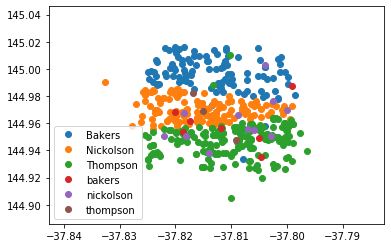

In [21]:
warehouses = dirty_data.groupby("nearest_warehouse")
fig = plt.figure()
ax = fig.add_subplot(111)
for name, warehouse in warehouses:
    plt.plot(warehouse["customer_lat"], warehouse["customer_long"], marker="o", linestyle="", label=name)
plt.legend()
ax.set_xlim(min(dirty_data["customer_lat"])-0.01, min(dirty_data["customer_lat"])+0.05)
ax.set_ylim(max(dirty_data["customer_long"])-0.13, max(dirty_data["customer_long"])+0.03)  

From the scatter plot, there are many customers who have the incorrect nearest warehouse. While we can observe that there are 3 main clusters (red, blue, purple), beside the incorrect name cases, there are some red, blue and purple dots placed in the wrong position. This is a semantic anomaly, where we have to redefine the true nearest warehouse of each customer. Our goal is to have a clean scatter plot without misplaced dots.

#### shopping_cart

In [22]:
# extract items name
dirty_data['items'] = dirty_data['shopping_cart'].apply(lambda x: re.findall(r"\(\'([\w\s\-\.]+)\'\,\s\d+\)", x))
itemz = list(chain.from_iterable(value for value in dirty_data['items']))
print(set(itemz))

{'Candle Inferno', 'Thunder line', 'Alcon 10', 'Universe Note', 'Lucent 330S', 'Toshika 750', 'iStream', 'pearTV', 'Olivia x460', 'iAssist Line'}


In [23]:
# check the amount of items were bought
FreqDist(itemz)

FreqDist({'Candle Inferno': 174, 'Universe Note': 160, 'Lucent 330S': 157, 'Toshika 750': 152, 'pearTV': 152, 'Olivia x460': 151, 'Thunder line': 142, 'Alcon 10': 141, 'iStream': 139, 'iAssist Line': 138})

We can see that there are exactly 10 different brand names, so there might be no problem with naming format.

#### season

In [24]:
# check for diffrent seasons
dirty_data.season.value_counts()

Winter    129
Spring    124
Autumn    121
Summer    105
summer      9
autumn      5
spring      4
winter      3
Name: season, dtype: int64

Season variable shares the same syntatic problem with the nearest_warehouse. There are less observations in Summer than other seasons, there might be some incorrect classification for the seasons.

In [25]:
# check correct month of season
pd.crosstab(dirty_data['season'],dirty_data['MM'])

MM,01,02,03,04,05,06,07,08,09,10,...,13,15,17,18,20,21,23,25,28,30
season,,,,,,,,,,,,,,,,,,,,,
Autumn,0,0,37,35,44,0,1,0,0,0,...,0,0,1,0,0,0,2,0,0,0
Spring,0,0,0,0,0,0,0,1,38,43,...,0,1,0,0,1,2,0,0,0,1
Summer,33,34,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,1
Winter,0,0,1,1,0,37,40,46,0,0,...,1,0,0,0,1,0,0,0,0,0
autumn,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
spring,0,1,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
summer,0,1,1,1,2,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
winter,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


We can see some months have wrong season. This is semantic anomaly.

#### delivery_charges, is_expedited_delivery and distance_to_nearest_warehouse

In [26]:
dirty_data['is_expedited_delivery'].value_counts()

False    271
True     229
Name: is_expedited_delivery, dtype: int64

More than half of the order are not expedited delivery.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9A429BF60>,
      dtype=object)

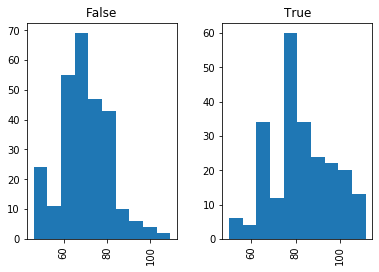

In [27]:
dirty_data.hist(by="is_expedited_delivery", column="delivery_charges")

In general, expedited delivery orders have higher delivery charges, however delivery charges are not depended only on expedited delivery but season and is customer happy also.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9A43F7240>]],
      dtype=object)

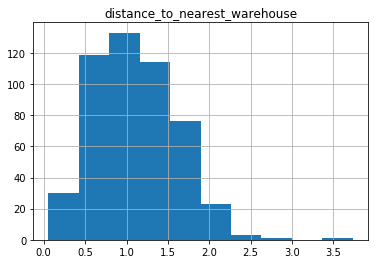

In [28]:
dirty_data.hist('distance_to_nearest_warehouse')

Mostly the distance_to_nearest_warehouse is around 1km, it varies from 0.5 to 1.5. However, we can see there are some distances which are over 2.5km to 3.5km so these can be semantic anomalies.

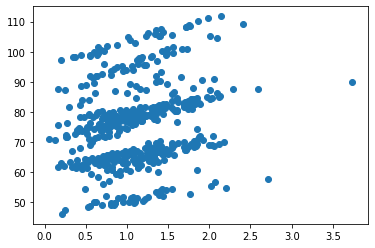

In [29]:
plt.scatter(dirty_data['distance_to_nearest_warehouse'],dirty_data['delivery_charges'])

Most of the customers have distance to the nearest warehouse around 1 km to 2km maximum. There are some customers 3.5km away from the nearest warehouse. Based on the scatter plot above, their far away distance can be wrong.

#### customer_lat, customer_long

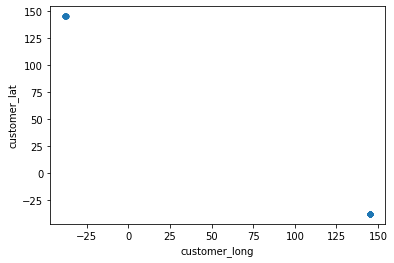

In [30]:
dirty_data.plot.scatter(x='customer_long',y='customer_lat')

A visualization of wrongly latitude and longitude. We already identified this problem with the describe() function above.

In [31]:
min(dirty_data['customer_long'])

-37.83429

In [32]:
max(dirty_data['customer_long'])

145.01601440000005

In [33]:
min(dirty_data['customer_lat'])

-37.83265120000001

In [34]:
max(dirty_data['customer_lat'])

145.0145371

Maximum latitude should not be higher than -37.8 and minimum longitude should not be lower than 144.9.

#### is_happy_customer and latest_customer_review

In [35]:
dirty_data["is_happy_customer"].value_counts()

True     348
False    152
Name: is_happy_customer, dtype: int64

In [36]:
dirty_data[dirty_data['latest_customer_review']=="None"]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,YYYY,MM,DD,items
24,ORD010062,ID1459448724,2019-04-02,Bakers,"[('pearTV', 1), ('iAssist Line', 1)]",8535,69.03,-37.819541,145.008441,25,6470.28,Autumn,False,1.5742,None,True,2019,04,02,"[pearTV, iAssist Line]"


In this dataset, there is one lastest_customer_review with value of "None". In this case, this might be a new customer who has their first order. Lack of customer review or their thought toward the products can be considered as a coverage anomaly.

In [37]:
dirty_data[dirty_data['latest_customer_review']==""]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,YYYY,MM,DD,items


Nearly 70% of customer is happy.

### 2.2. missing_data

In [38]:
# take a look at the data
missing_data.head(5)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD446975,ID0207093574,2019-01-08,Bakers,"[('iAssist Line', 2), ('Candle Inferno', 1), (...",5180.0,98.31,-37.803624,145.007949,0,5278.31,Summer,True,1.3244,five stars all good. met the expectations.,1.0
1,ORD398405,ID0577459022,2019-10-29,NaN,"[('iStream', 2), ('Thunder line', 2), ('Candle...",5520.0,94.90,-37.817401,144.970546,5,5338.90,Spring,True,NaN,five stars everything was fine!,1.0
2,ORD210364,ID2069604225,2019-05-22,Bakers,"[('Olivia x460', 2), ('pearTV', 2), ('Lucent 3...",23200.0,69.06,-37.802215,144.980289,0,23269.06,Autumn,False,1.5740,working great without issues as described. wor...,1.0
3,ORD008848,ID1492410198,2019-12-27,Nickolson,"[('iStream', 1), ('Thunder line', 2), ('Olivia...",5735.0,83.72,-37.806579,144.962869,10,5245.22,Summer,True,1.4610,"no, i received the phone and instead of white ...",0.0
4,ORD186466,ID0581784158,2019-04-12,Thompson,"[('iAssist Line', 2), ('pearTV', 1), ('Toshika...",17260.0,49.94,-37.807741,144.939718,25,12994.94,Autumn,False,0.8481,didn't get the correct phone purchased this ph...,0.0


In [39]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              445 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    485 non-null    float64
 6   delivery_charges               460 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    485 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

Observation on missing values:
* Nearest_warehouse missing is 55 values
* Order_price is missing 15 values
* Delievery_charges is missing 40 values
* Order_total is missing 15 values
* Distance_to_nearst_warehouse is missing 31 values
* Is_happy_customer is missing 40 values

In [40]:
# get statistic summary of the numerical variables
missing_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse,is_happy_customer
count,485.000000,460.000000,500.000000,500.000000,500.000000,485.000000,469.000000,460.000000
mean,13682.123711,77.678000,-37.812003,144.966729,10.810000,12281.317773,1.144402,0.745652
std,7895.683288,15.139205,0.007932,0.021205,8.908008,7176.592771,0.553519,0.435968
min,730.000000,46.970000,-37.840654,144.905164,0.000000,739.230000,0.103200,0.000000
25%,7730.000000,66.220000,-37.818124,144.952106,5.000000,6722.100000,0.758800,0.000000
50%,11990.000000,76.695000,-37.812324,144.963427,10.000000,10850.500000,1.074300,1.000000
75%,19280.000000,85.147500,-37.805403,144.979844,15.000000,17004.760000,1.513200,1.000000
max,40020.000000,118.730000,-37.777098,145.018679,25.000000,35767.810000,4.402800,1.000000


### 2.3. outlier_data

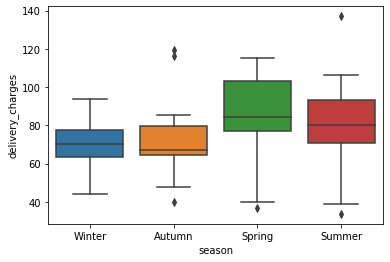

In [41]:
sns.boxplot(data=outlier_data, x='season',y='delivery_charges')

We can see that, delivery charge in Spring and Summer is higher. There are upper outliers in Summer and Autumn and lower outliers in Spring, Summer and Autumn.

## 3. Fixing Anomalies 

### 3.1. Fixing dirty_data

#### Methodology

From EDA, we can see identify the problems:

Syntactic
* Lower case season names
* Lower case warehouse names
* Wrong data format (DD-MM-YYYY or YYYY-MM-DD)

Sematic
* Month higher than 12
* Wrong season for months
* High latitudes and low longitudes
* Wrong nearest_warehouse for some customers

Coverage Anomalies:
* Missing data in several columns in missing_data file

There might be more anomalies which I have not checked in EDA process:
* Conficts between order total != order price * coupon discount + delivery charges
* Valid items in shopping cart
* Is customer really happy

While each row only contains one incorrect data, so I will prioritize fixing more obvious problems first.

Problem priorities:
* Customer lat - long
* Wrong date
* Seasons date
* Seasons capitalize case
* True nearest warehouse
* Distance to nearest warehouse
* Warehouse capitalize case
* Order price
* Order total
* Item names
* Customer is happy

I will flag each row to identify which one was fixed.


In [42]:
# reset the dataset here
dirty_data = pd.read_csv("30475422_dirty_data.csv")
dirty_data['fixed_flag'] = 'False'
dirty_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag
0,ORD343162,ID0650276301,2019-01-11,Bakers,"[('iAssist Line', 1), ('Lucent 330S', 1), ('iS...",8790,95.82,-37.812714,144.982752,25,2912.07,Summer,True,1.1384,great buy nice cheap phone. use for a backup o...,True,False
1,ORD071177,ID2383218752,2019-07-03,Thompson,"[('Toshika 750', 2), ('Candle Inferno', 1)]",9070,81.28,-37.800452,144.959931,0,9151.28,Autumn,True,1.7693,"nice renewed phone phone reached on time, over...",True,False
2,ORD327227,ID5001030328,2019-11-15,Thompson,"[('Candle Inferno', 1), ('iStream', 2), ('Thun...",2910,74.91,-37.811503,144.952677,25,2257.41,Spring,False,0.5101,cell phone phone is amazing thus far. set up w...,True,False
3,ORD117028,ID6167441078,2019-05-13,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",14860,63.04,-37.815780,144.965169,15,12694.04,Autumn,True,0.4967,tablet was brought for my fiance for christmas...,False,False
4,ORD403847,ID2188399790,2019-08-15,Nickolson,"[('Universe Note', 1), ('iAssist Line', 1), ('...",23875,75.97,-37.812775,144.968184,25,17982.22,Winter,True,0.6589,five stars great buy and way cheaper than buyi...,True,False


#### 3.1.1. Incorrect Latitude and Longitude

In [43]:
# check for latitude that are greater than 0 (correct latitude should be around -37.8)
dirty_data[dirty_data['customer_lat'] > 0].head(10)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag
27,ORD170764,ID2686224640,2019-02-23,Bakers,"[('iAssist Line', 1), ('Lucent 330S', 1), ('To...",12095,70.13,145.001491,-37.811394,25,9141.38,Summer,False,0.5720,five stars definitely will recommend this phon...,True,False
79,ORD139901,ID0301542599,2019-11-29,Thompson,"[('Candle Inferno', 2), ('pearTV', 2)]",13480,64.48,144.949866,-37.822139,10,12196.48,Spring,False,1.0820,this was a major loss! speaker does not work t...,False,False
98,ORD209815,ID0575392033,2019-08-17,Nickolson,"[('Lucent 330S', 1), ('Toshika 750', 2)]",9870,67.58,144.983968,-37.821389,25,7470.08,Winter,False,1.3054,great phone! great seller! i bought it two yea...,True,False
102,ORD114641,ID4716795379,2019-08-12,Thompson,"[('Lucent 330S', 2), ('Candle Inferno', 2), ('...",6770,51.53,144.953532,-37.818785,5,6483.03,Winter,False,0.8866,item could not be activated. my olivia univers...,False,False
112,ORD260004,ID0052450505,2019-11-24,Thompson,"[('pearTV', 2), ('Universe Note', 1), ('Alcon ...",33970,111.74,144.936073,-37.795479,25,25589.24,Spring,True,2.1445,four stars i had a problem with my 1st order b...,True,False
127,ORD361737,ID0026034662,2019-05-12,Nickolson,"[('Candle Inferno', 2), ('iAssist Line', 1), (...",10895,66.14,144.966684,-37.809868,10,9871.64,Autumn,False,1.0036,very satisfying purchase ! i bought this i pho...,True,False
164,ORD147517,ID0033085559,2019-03-04,Thompson,"[('Lucent 330S', 1), ('iStream', 2), ('Alcon 1...",28070,80.67,144.957062,-37.810339,10,25343.67,Autumn,True,0.9165,this is a great tablet for the price. i have o...,True,False
192,ORD284410,ID0576845696,2019-02-23,Bakers,"[('iAssist Line', 1), ('Lucent 330S', 1)]",3455,101.64,144.988975,-37.823058,0,3556.64,Summer,True,1.5546,great service + phone. arrived on time. great ...,True,False
193,ORD034580,ID0443279899,2019-11-14,Bakers,"[('Lucent 330S', 1), ('Toshika 750', 2), ('Alc...",27770,76.07,144.991683,-37.815418,5,26457.57,Spring,False,0.6795,good value for money nice cheap will all basic...,True,False
221,ORD350417,ID0030946383,2019-02-17,Nickolson,"[('Universe Note', 1), ('Thunder line', 2)]",7810,86.13,144.973566,-37.800013,10,7115.13,Summer,False,2.0984,check batteries right away i purchased two. fo...,True,False


In [44]:
# check for longitude that are smaller than 0 (correct latitude should be around 144.90)
dirty_data[dirty_data['customer_long'] < 0].head(10)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag
27,ORD170764,ID2686224640,2019-02-23,Bakers,"[('iAssist Line', 1), ('Lucent 330S', 1), ('To...",12095,70.13,145.001491,-37.811394,25,9141.38,Summer,False,0.5720,five stars definitely will recommend this phon...,True,False
79,ORD139901,ID0301542599,2019-11-29,Thompson,"[('Candle Inferno', 2), ('pearTV', 2)]",13480,64.48,144.949866,-37.822139,10,12196.48,Spring,False,1.0820,this was a major loss! speaker does not work t...,False,False
98,ORD209815,ID0575392033,2019-08-17,Nickolson,"[('Lucent 330S', 1), ('Toshika 750', 2)]",9870,67.58,144.983968,-37.821389,25,7470.08,Winter,False,1.3054,great phone! great seller! i bought it two yea...,True,False
102,ORD114641,ID4716795379,2019-08-12,Thompson,"[('Lucent 330S', 2), ('Candle Inferno', 2), ('...",6770,51.53,144.953532,-37.818785,5,6483.03,Winter,False,0.8866,item could not be activated. my olivia univers...,False,False
112,ORD260004,ID0052450505,2019-11-24,Thompson,"[('pearTV', 2), ('Universe Note', 1), ('Alcon ...",33970,111.74,144.936073,-37.795479,25,25589.24,Spring,True,2.1445,four stars i had a problem with my 1st order b...,True,False
127,ORD361737,ID0026034662,2019-05-12,Nickolson,"[('Candle Inferno', 2), ('iAssist Line', 1), (...",10895,66.14,144.966684,-37.809868,10,9871.64,Autumn,False,1.0036,very satisfying purchase ! i bought this i pho...,True,False
164,ORD147517,ID0033085559,2019-03-04,Thompson,"[('Lucent 330S', 1), ('iStream', 2), ('Alcon 1...",28070,80.67,144.957062,-37.810339,10,25343.67,Autumn,True,0.9165,this is a great tablet for the price. i have o...,True,False
192,ORD284410,ID0576845696,2019-02-23,Bakers,"[('iAssist Line', 1), ('Lucent 330S', 1)]",3455,101.64,144.988975,-37.823058,0,3556.64,Summer,True,1.5546,great service + phone. arrived on time. great ...,True,False
193,ORD034580,ID0443279899,2019-11-14,Bakers,"[('Lucent 330S', 1), ('Toshika 750', 2), ('Alc...",27770,76.07,144.991683,-37.815418,5,26457.57,Spring,False,0.6795,good value for money nice cheap will all basic...,True,False
221,ORD350417,ID0030946383,2019-02-17,Nickolson,"[('Universe Note', 1), ('Thunder line', 2)]",7810,86.13,144.973566,-37.800013,10,7115.13,Summer,False,2.0984,check batteries right away i purchased two. fo...,True,False


In [45]:
# check for number of incorrect observations
dirty_data[dirty_data['customer_long'] < 0].shape[0]

27

In [46]:
idx = (dirty_data['customer_lat'] > 0) & (dirty_data['fixed_flag'] == 'False')
dirty_data.loc[idx,['customer_lat', 'customer_long']] = dirty_data.loc[idx,['customer_long','customer_lat']].values
dirty_data.loc[idx,'fixed_flag'] = 'Lat-Long'


In [47]:
dirty_data[dirty_data['customer_long'] < 0].head(10)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag


In [48]:
dirty_data[dirty_data['customer_lat'] > 0].head(10)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag


In [49]:
dirty_data['fixed_flag'].value_counts()

False       473
Lat-Long     27
Name: fixed_flag, dtype: int64

#### 3.1.2. Wrong date format

In [50]:
dirty_data['YYYY'] = dirty_data['date'].str.extract("(\d{4})-\d{2}-\d{2}")
dirty_data['MM'] = dirty_data['date'].str.extract("\d{4}-(\d{2})-\d{2}")
dirty_data['DD'] = dirty_data['date'].str.extract("\d{4}-\d{2}-(\d{2})")

In [51]:
idx = (dirty_data['YYYY'] != '2019') & (dirty_data['fixed_flag'] == 'False')
dirty_data.loc[idx,'YYYY'] = '2019'
# get DD and MM from DD-MM-YYYY format
dirty_data['MM2'] = dirty_data['date'].str.extract("\d{2}-(\d{2})-\d{4}")
dirty_data['DD2'] = dirty_data['date'].str.extract("(\d{2})-\d{2}-\d{4}")
# fix MM and DD
dirty_data.loc[idx,'MM'] = dirty_data.loc[idx,'MM2'].values
dirty_data.loc[idx,'DD'] = dirty_data.loc[idx,'DD2'].values
dirty_data.loc[idx,'fixed_flag']  = 'year'

In [52]:
# test on one random order_id
dirty_data[dirty_data['order_id']=='ORD483727']

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag,YYYY,MM,DD,MM2,DD2
155,ORD483727,ID0242532862,01-03-2019,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 1), ('pearT...",29885,69.9,-37.799203,144.972911,25,...,False,2.1788,very easy to set up and very easy to use,True,year,2019,03,01,03,01


In [53]:
dirty_data['YYYY'].value_counts()

2019    500
Name: YYYY, dtype: int64

In [54]:
# remove abundant columns after done fixing
dirty_data = dirty_data.drop(['MM2','DD2'],axis=1)

In [55]:
idx = (pd.to_numeric(dirty_data['MM']) > 12) & (dirty_data['fixed_flag'] == 'False')
# swap MM and DD for MM-DD-YYYY format
dirty_data.loc[idx,['MM', 'DD']] = dirty_data.loc[idx,['DD','MM']].values
dirty_data.loc[idx,'fixed_flag'] = 'month'

In [56]:
dirty_data['MM'].value_counts().sort_index(ascending=True)

01    38
02    37
03    41
04    41
05    48
06    40
07    44
08    50
09    44
10    47
11    39
12    31
Name: MM, dtype: int64

In [57]:
# recreate new date after fixing YYYY and MM
dirty_data['date_new'] = dirty_data['YYYY'] + "-" + dirty_data['MM'] + "-" + dirty_data['DD']
dirty_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag,YYYY,MM,DD,date_new
0,ORD343162,ID0650276301,2019-01-11,Bakers,"[('iAssist Line', 1), ('Lucent 330S', 1), ('iS...",8790,95.82,-37.812714,144.982752,25,...,Summer,True,1.1384,great buy nice cheap phone. use for a backup o...,True,False,2019,01,11,2019-01-11
1,ORD071177,ID2383218752,2019-07-03,Thompson,"[('Toshika 750', 2), ('Candle Inferno', 1)]",9070,81.28,-37.800452,144.959931,0,...,Autumn,True,1.7693,"nice renewed phone phone reached on time, over...",True,False,2019,07,03,2019-07-03
2,ORD327227,ID5001030328,2019-11-15,Thompson,"[('Candle Inferno', 1), ('iStream', 2), ('Thun...",2910,74.91,-37.811503,144.952677,25,...,Spring,False,0.5101,cell phone phone is amazing thus far. set up w...,True,False,2019,11,15,2019-11-15
3,ORD117028,ID6167441078,2019-05-13,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",14860,63.04,-37.815780,144.965169,15,...,Autumn,True,0.4967,tablet was brought for my fiance for christmas...,False,False,2019,05,13,2019-05-13
4,ORD403847,ID2188399790,2019-08-15,Nickolson,"[('Universe Note', 1), ('iAssist Line', 1), ('...",23875,75.97,-37.812775,144.968184,25,...,Winter,True,0.6589,five stars great buy and way cheaper than buyi...,True,False,2019,08,15,2019-08-15


In [58]:
# check for mismatch date
dirty_data[dirty_data['date'] != dirty_data['date_new']]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag,YYYY,MM,DD,date_new
5,ORD132046,ID4520380543,2019-15-09,Nickolson,"[('Toshika 750', 1), ('pearTV', 2), ('Alcon 10...",25890,76.93,-37.817585,144.959208,10,...,Spring,False,0.9165,slim n elegant look.. slim n comfortable to ho...,True,month,2019,09,15,2019-09-15
34,ORD481726,ID1132014824,2019-17-03,Thompson,"[('Lucent 330S', 2), ('Universe Note', 1), ('T...",10270,64.03,-37.817920,144.946174,10,...,Autumn,True,0.5893,"check one, two. test one, two. the microphone ...",False,month,2019,03,17,2019-03-17
41,ORD225276,ID3261098662,09-08-2019,Thompson,"[('Universe Note', 1), ('Lucent 330S', 1)]",4680,65.88,-37.819244,144.933036,25,...,Winter,True,1.4345,mejorar coordinación en sus cobros nunca recib...,False,year,2019,08,09,2019-08-09
51,ORD401154,ID0663120915,2019-21-09,Thompson,"[('Olivia x460', 2), ('Toshika 750', 1), ('Uni...",13970,105.68,-37.800230,144.955062,25,...,Spring,True,1.5533,five stars good,True,month,2019,09,21,2019-09-21
90,ORD210330,ID0060653706,2019-20-08,Thompson,"[('Toshika 750', 1), ('iAssist Line', 1)]",6545,75.04,-37.817899,144.950268,0,...,Winter,True,0.6462,the price is very reasonable and very happy wi...,True,month,2019,08,20,2019-08-20
124,ORD461462,ID4740822037,2019-30-12,Thompson,"[('Thunder line', 2), ('iAssist Line', 2), ('A...",29160,93.89,-37.803332,144.949998,5,...,Summer,True,1.0712,really like the camera just have had it for a ...,True,month,2019,12,30,2019-12-30
126,ORD354254,ID0364846844,2019-23-04,Bakers,"[('Candle Inferno', 1), ('iStream', 1), ('Univ...",6480,67.80,-37.803824,144.980433,5,...,Autumn,False,1.4718,five stars i love this phone and it's still in...,True,month,2019,04,23,2019-04-23
138,ORD452053,ID6167279385,2019-30-09,Thompson,"[('iStream', 1), ('Candle Inferno', 2), ('Oliv...",3460,74.35,-37.812384,144.953951,0,...,Spring,False,0.6061,great product loved it,True,month,2019,09,30,2019-09-30
155,ORD483727,ID0242532862,01-03-2019,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 1), ('pearT...",29885,69.90,-37.799203,144.972911,25,...,Autumn,False,2.1788,very easy to set up and very easy to use,True,year,2019,03,01,2019-03-01
176,ORD342842,ID0036821476,05-01-2019,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('Univ...",16430,73.70,-37.826063,144.965427,5,...,Summer,False,0.9070,five stars great phone,True,year,2019,01,05,2019-01-05


In [59]:
dirty_data['fixed_flag'].value_counts()

False       446
Lat-Long     27
month        15
year         12
Name: fixed_flag, dtype: int64

So there are 27 mismatch date including 12 observations related to year error and 15 observations related to month error.

In [60]:
dirty_data.loc[dirty_data['date'] != dirty_data['date_new'], 'date']  = dirty_data.loc[dirty_data['date'] != dirty_data['date_new'], 'date_new'].values

In [61]:
dirty_data[dirty_data['date'] != dirty_data['date_new']]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag,YYYY,MM,DD,date_new


In [62]:
# test on one random order_id
dirty_data[dirty_data['order_id']=='ORD481726']

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag,YYYY,MM,DD,date_new
34,ORD481726,ID1132014824,2019-03-17,Thompson,"[('Lucent 330S', 2), ('Universe Note', 1), ('T...",10270,64.03,-37.81792,144.946174,10,...,Autumn,True,0.5893,"check one, two. test one, two. the microphone ...",False,month,2019,03,17,2019-03-17


#### 3.1.3. Incorrect season for month

In [63]:
# check correct month of season
pd.crosstab(dirty_data['season'],dirty_data['MM'])

MM,01,02,03,04,05,06,07,08,09,10,11,12
season,,,,,,,,,,,,
Autumn,0,0,39,37,44,0,1,0,0,0,0,0
Spring,0,0,0,0,0,0,0,1,42,44,37,0
Summer,37,35,0,1,1,0,0,0,0,0,0,31
Winter,0,0,1,1,0,38,41,48,0,0,0,0
autumn,0,0,0,1,1,0,1,1,0,0,1,0
spring,0,1,0,0,0,0,1,0,1,1,0,0
summer,0,1,1,1,2,1,0,0,0,2,1,0
winter,1,0,0,0,0,1,0,0,1,0,0,0


There are some observations which have the wrong season, which follow season pattern of Northern hemisphere. Now we need to set rule base on the Climate Glossary of Australian Government to correcting the seasons based on month.



In [64]:
idx = (dirty_data['season']!='Spring') & (dirty_data['MM'].isin(['09','10','11'])) & (dirty_data['fixed_flag'] == 'False')
dirty_data.loc[idx,'season'] = 'Spring'
dirty_data.loc[idx,'fixed_flag'] = 'season'

In [65]:
idx = (dirty_data['season']!='Summer') & (dirty_data['MM'].isin(['12','01','02'])) & (dirty_data['fixed_flag'] == 'False')
dirty_data.loc[idx,'season'] = 'Summer'
dirty_data.loc[idx,'fixed_flag'] = 'season'

In [66]:
idx = (dirty_data['season']!='Autumn') & (dirty_data['MM'].isin(['03','04','05'])) & (dirty_data['fixed_flag'] == 'False')
dirty_data.loc[idx,'season'] = 'Autumn'
dirty_data.loc[idx,'fixed_flag'] = 'season'

In [67]:
idx = (dirty_data['season']!='Winter') & (dirty_data['MM'].isin(['06','07','08'])) & (dirty_data['fixed_flag'] == 'False')
dirty_data.loc[idx,'season'] = 'Winter'
dirty_data.loc[idx,'fixed_flag'] = 'season'

In [68]:
# check result again
pd.crosstab(dirty_data['season'],dirty_data['MM'])

MM,01,02,03,04,05,06,07,08,09,10,11,12
season,,,,,,,,,,,,
Autumn,0,0,41,41,48,0,0,0,0,0,0,0
Spring,0,0,0,0,0,0,0,0,44,47,39,0
Summer,38,37,0,0,0,0,0,0,0,0,0,31
Winter,0,0,0,0,0,40,44,50,0,0,0,0


After set the months into their correct seasons, lower case seasons are also fixed at the same time.

In [69]:
dirty_data['fixed_flag'].value_counts()

False       419
Lat-Long     27
season       27
month        15
year         12
Name: fixed_flag, dtype: int64

Now all date and season related data had been fixed.

In [70]:
dirty_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag,YYYY,MM,DD,date_new
0,ORD343162,ID0650276301,2019-01-11,Bakers,"[('iAssist Line', 1), ('Lucent 330S', 1), ('iS...",8790,95.82,-37.812714,144.982752,25,...,Summer,True,1.1384,great buy nice cheap phone. use for a backup o...,True,False,2019,01,11,2019-01-11
1,ORD071177,ID2383218752,2019-07-03,Thompson,"[('Toshika 750', 2), ('Candle Inferno', 1)]",9070,81.28,-37.800452,144.959931,0,...,Winter,True,1.7693,"nice renewed phone phone reached on time, over...",True,season,2019,07,03,2019-07-03
2,ORD327227,ID5001030328,2019-11-15,Thompson,"[('Candle Inferno', 1), ('iStream', 2), ('Thun...",2910,74.91,-37.811503,144.952677,25,...,Spring,False,0.5101,cell phone phone is amazing thus far. set up w...,True,False,2019,11,15,2019-11-15
3,ORD117028,ID6167441078,2019-05-13,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",14860,63.04,-37.815780,144.965169,15,...,Autumn,True,0.4967,tablet was brought for my fiance for christmas...,False,False,2019,05,13,2019-05-13
4,ORD403847,ID2188399790,2019-08-15,Nickolson,"[('Universe Note', 1), ('iAssist Line', 1), ('...",23875,75.97,-37.812775,144.968184,25,...,Winter,True,0.6589,five stars great buy and way cheaper than buyi...,True,False,2019,08,15,2019-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD382945,ID0441029077,2019-06-02,Thompson,"[('Olivia x460', 1), ('Universe Note', 2), ('C...",8985,61.87,-37.811397,144.937908,0,...,Winter,True,0.8181,"no entregarán. no lo he recibido ese artículo,...",False,False,2019,06,02,2019-06-02
496,ORD309359,ID4716795464,2019-01-04,Thompson,"[('iStream', 1), ('Lucent 330S', 2), ('Olivia ...",3835,78.29,-37.818757,144.953239,10,...,Summer,True,0.8678,it's not able to detect the 5ghz wifi network ...,False,False,2019,01,04,2019-01-04
497,ORD269894,ID0846547014,2019-03-24,Nickolson,"[('iAssist Line', 2), ('Universe Note', 2), ('...",11780,62.27,-37.820184,144.968612,15,...,Autumn,False,1.1740,sleek!!! great phone love all the features and...,True,False,2019,03,24,2019-03-24
498,ORD218229,ID6167236648,2019-04-04,Nickolson,"[('Olivia x460', 2), ('Candle Inferno', 1), ('...",3030,81.09,-37.812907,144.959681,0,...,Autumn,True,1.0743,best product i like this phone very much. grea...,True,False,2019,04,04,2019-04-04


In [71]:
# remove columns after done fixing
dirty_data = dirty_data.drop(['YYYY','MM','DD','date_new'], axis=1)

#### 3.1.4. Distance to nearest warehouse

In [72]:
# input warehouse lattitude and longitude from provided file
def warehouse_lat(warehouse):
    if warehouse == 'Nickolson':
        return -37.818595
    elif warehouse == 'Thompson':
        return -37.8126732
    elif warehouse == 'Bakers':
        return -37.8099961
    
def warehouse_long(warehouse):
    if warehouse == 'Nickolson':
        return 144.969551
    elif warehouse == 'Thompson':
        return 144.9470689
    elif warehouse == 'Bakers':
        return 144.995232

In [73]:
# function to look for the warehouse with smalle
def min_warehouse(dirty_data):   
    '''
    Finding the nearest warehouse for each customer by haversine distance, using provided location of 3 warehouse
    '''
    lat1, lon1 = dirty_data['customer_location']
    latN, lonN = (-37.818595,144.969551)
    latT, lonT = (-37.8126732,144.9470689)
    latB, lonB = (-37.8099961,144.995232)
    radius = 6378
    
    dlat = math.radians(latN - lat1)
    dlon = math.radians(lonN - lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(latN)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    dN = radius * c
    
    dlat = math.radians(latT - lat1)
    dlon = math.radians(lonT - lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(latT)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    dT = radius * c
    
    dlat = math.radians(latB - lat1)
    dlon = math.radians(lonB - lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(latB)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    dB = radius * c
    
    if dN == min(dN, dT, dB):
        return "Nickolson"
    elif dT == min(dN, dT, dB):
        return "Thompson"
    elif dB == min(dN, dT, dB):
        return "Bakers"
    else:
        return "Not found"

In [74]:
# combine lattitude and longitude into one attribute for easier to calculate the distance between two locations
dirty_data['customer_location'] = list(zip(dirty_data.customer_lat, dirty_data.customer_long))

In [75]:
dirty_data['true_warehouse'] = dirty_data.apply(min_warehouse, axis=1)
dirty_data['true_warehouse'].value_counts()

Thompson     221
Nickolson    164
Bakers       115
Name: true_warehouse, dtype: int64

In [76]:
dirty_data['nearest_warehouse'].value_counts()

Thompson     209
Nickolson    157
Bakers       113
nickolson     11
bakers         7
thompson       3
Name: nearest_warehouse, dtype: int64

We can see there are some different between the warehouse names here. Because I recalculated the distance and find the true nearest warehouse so I just replace the initial data with the new one.

In [77]:
dirty_data.head(5)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag,customer_location,true_warehouse
0,ORD343162,ID0650276301,2019-01-11,Bakers,"[('iAssist Line', 1), ('Lucent 330S', 1), ('iS...",8790,95.82,-37.812714,144.982752,25,2912.07,Summer,True,1.1384,great buy nice cheap phone. use for a backup o...,True,False,"(-37.8127138, 144.9827524)",Bakers
1,ORD071177,ID2383218752,2019-07-03,Thompson,"[('Toshika 750', 2), ('Candle Inferno', 1)]",9070,81.28,-37.800452,144.959931,0,9151.28,Winter,True,1.7693,"nice renewed phone phone reached on time, over...",True,season,"(-37.8004517, 144.9599314)",Thompson
2,ORD327227,ID5001030328,2019-11-15,Thompson,"[('Candle Inferno', 1), ('iStream', 2), ('Thun...",2910,74.91,-37.811503,144.952677,25,2257.41,Spring,False,0.5101,cell phone phone is amazing thus far. set up w...,True,False,"(-37.8115028, 144.95267719999995)",Thompson
3,ORD117028,ID6167441078,2019-05-13,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",14860,63.04,-37.815780,144.965169,15,12694.04,Autumn,True,0.4967,tablet was brought for my fiance for christmas...,False,False,"(-37.8157799, 144.96516880000001)",Nickolson
4,ORD403847,ID2188399790,2019-08-15,Nickolson,"[('Universe Note', 1), ('iAssist Line', 1), ('...",23875,75.97,-37.812775,144.968184,25,17982.22,Winter,True,0.6589,five stars great buy and way cheaper than buyi...,True,False,"(-37.8127749, 144.968184)",Nickolson


(144.88601440000005, 145.04601440000005)

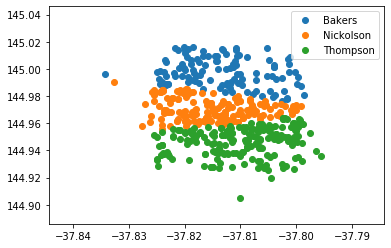

In [78]:
# plot the data again to see if the nearest warehouse is correct
warehouses = dirty_data.groupby("true_warehouse")
fig = plt.figure()
ax = fig.add_subplot(111)
for name, warehouse in warehouses:
    plt.plot(warehouse["customer_lat"], warehouse["customer_long"], marker="o", linestyle="", label=name)
plt.legend()
ax.set_xlim(min(dirty_data["customer_lat"])-0.01, min(dirty_data["customer_lat"])+0.05)
ax.set_ylim(max(dirty_data["customer_long"])-0.13, max(dirty_data["customer_long"])+0.03)  

Now the scatter plot is different from the begining, warehouses are assigned to correct customers.

In [79]:
idx = (dirty_data['nearest_warehouse'] != dirty_data['true_warehouse']) & (dirty_data['fixed_flag'] == 'False')
dirty_data.loc[idx,'nearest_warehouse'] = dirty_data.loc[idx,'true_warehouse'].values
dirty_data.loc[idx,'fixed_flag'] = 'warehouse'

In [80]:
# create warehouse_lat and warehouse_long attributes corresponding to nearest_warehouse attribute
dirty_data['warehouse_lat'] = dirty_data['nearest_warehouse'].apply(warehouse_lat)
dirty_data['warehouse_long'] = dirty_data['nearest_warehouse'].apply(warehouse_long)
dirty_data.head(5)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag,customer_location,true_warehouse,warehouse_lat,warehouse_long
0,ORD343162,ID0650276301,2019-01-11,Bakers,"[('iAssist Line', 1), ('Lucent 330S', 1), ('iS...",8790,95.82,-37.812714,144.982752,25,...,Summer,True,1.1384,great buy nice cheap phone. use for a backup o...,True,False,"(-37.8127138, 144.9827524)",Bakers,-37.809996,144.995232
1,ORD071177,ID2383218752,2019-07-03,Thompson,"[('Toshika 750', 2), ('Candle Inferno', 1)]",9070,81.28,-37.800452,144.959931,0,...,Winter,True,1.7693,"nice renewed phone phone reached on time, over...",True,season,"(-37.8004517, 144.9599314)",Thompson,-37.812673,144.947069
2,ORD327227,ID5001030328,2019-11-15,Thompson,"[('Candle Inferno', 1), ('iStream', 2), ('Thun...",2910,74.91,-37.811503,144.952677,25,...,Spring,False,0.5101,cell phone phone is amazing thus far. set up w...,True,False,"(-37.8115028, 144.95267719999995)",Thompson,-37.812673,144.947069
3,ORD117028,ID6167441078,2019-05-13,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",14860,63.04,-37.815780,144.965169,15,...,Autumn,True,0.4967,tablet was brought for my fiance for christmas...,False,False,"(-37.8157799, 144.96516880000001)",Nickolson,-37.818595,144.969551
4,ORD403847,ID2188399790,2019-08-15,Nickolson,"[('Universe Note', 1), ('iAssist Line', 1), ('...",23875,75.97,-37.812775,144.968184,25,...,Winter,True,0.6589,five stars great buy and way cheaper than buyi...,True,False,"(-37.8127749, 144.968184)",Nickolson,-37.818595,144.969551


In [81]:
# create function for calculate the distance between two location based on lattitude and longitude
def distance(dirty_data): 
    
    lat1, lon1 = dirty_data['customer_location']
    lat2, lon2 = dirty_data['warehouse_location']
    radius = 6378 # Earth radius
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    
    return round(d,4) # round distance to 4 decimal place

In [82]:
# combine lattitude and longitude into one attribute for easier to calculate the distance between two locations
dirty_data['warehouse_location'] = list(zip(dirty_data.warehouse_lat, dirty_data.warehouse_long))
# calculate the distance
dirty_data['distance_to_nearest_warehouse'] = pd.to_numeric(dirty_data['distance_to_nearest_warehouse'])
dirty_data['distance'] = dirty_data.apply(distance, axis=1)


In [83]:
dirty_data[dirty_data['distance'] != round(dirty_data['distance_to_nearest_warehouse'],4)]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag,customer_location,true_warehouse,warehouse_lat,warehouse_long,warehouse_location,distance
6,ORD470559,ID3543026232,2019-11-29,Thompson,"[('Lucent 330S', 1), ('Candle Inferno', 2), ('...",5540,72.52,-37.813309,144.951402,10,...,0.5201,excellent great buy,True,False,"(-37.813309000000004, 144.9514018)",Thompson,-37.812673,144.947069,"(-37.8126732, 144.9470689)",0.3876
21,ORD154519,ID0847529568,2019-06-01,Nickolson,"[('Universe Note', 2), ('Thunder line', 1), ('...",16620,64.15,-37.823708,144.967275,0,...,0.3900,great android for the money it can't be beat g...,True,False,"(-37.823708, 144.9672747)",Nickolson,-37.818595,144.969551,"(-37.818595, 144.969551)",0.6033
28,ORD150573,ID0591435980,2019-08-25,Nickolson,"[('Candle Inferno', 1), ('Olivia x460', 2), ('...",6330,73.93,-37.818551,144.965708,25,...,0.5001,great phone at great price great phone at grea...,True,False,"(-37.818551299999996, 144.9657084)",Nickolson,-37.818595,144.969551,"(-37.818595, 144.969551)",0.3379
57,ORD370884,ID0305106971,2019-05-05,Thompson,"[('Lucent 330S', 2), ('iStream', 2), ('iAssist...",7210,74.49,-37.811578,144.945967,0,...,1.8534,good phone pretty good phone,True,False,"(-37.8115781, 144.94596719999996)",Thompson,-37.812673,144.947069,"(-37.8126732, 144.9470689)",0.1557
59,ORD076447,ID0577517977,2019-09-20,Nickolson,"[('Thunder line', 1), ('iStream', 1)]",2330,78.60,-37.827019,144.974127,5,...,1.3180,"amazing, i love this phone note 8 is great, i ...",True,False,"(-37.8270191, 144.9741274)",Nickolson,-37.818595,144.969551,"(-37.818595, 144.969551)",1.0204
70,ORD205139,ID0298045607,2019-06-10,Nickolson,"[('Thunder line', 2), ('Alcon 10', 2)]",22260,78.28,-37.824183,144.963221,10,...,0.4300,five stars overall a great phone,True,False,"(-37.824182799999996, 144.9632211)",Nickolson,-37.818595,144.969551,"(-37.818595, 144.969551)",0.8347
88,ORD034651,ID4283908155,2019-11-15,Bakers,"[('Universe Note', 1), ('Thunder line', 2), ('...",16760,95.90,-37.810092,144.996006,0,...,0.7203,"good product fast shipping, the phone came per...",True,False,"(-37.810092299999994, 144.9960059)",Bakers,-37.809996,144.995232,"(-37.8099961, 144.995232)",0.0689
97,ORD281520,ID2975216748,2019-12-12,Thompson,"[('Olivia x460', 2), ('Lucent 330S', 1)]",3680,89.77,-37.798931,144.959282,0,...,0.6033,bad deal internationally on an att contract lo...,False,False,"(-37.798930799999994, 144.9592816)",Thompson,-37.812673,144.947069,"(-37.8126732, 144.9470689)",1.8692
100,ORD003417,ID6167489454,2019-03-19,Nickolson,"[('Toshika 750', 2), ('Candle Inferno', 1), ('...",16970,80.12,-37.814003,144.960338,15,...,0.6521,great phone my hubby is dangerous on cell phon...,True,False,"(-37.8140025, 144.9603382)",Nickolson,-37.818595,144.969551,"(-37.818595, 144.969551)",0.9580
116,ORD072666,ID0575380813,2019-06-08,Nickolson,"[('Olivia x460', 2), ('Candle Inferno', 2)]",3310,65.41,-37.820214,144.982519,0,...,0.7086,got a faulty phone. waste of time. though it s...,False,False,"(-37.8202141, 144.9825186)",Nickolson,-37.818595,144.969551,"(-37.818595, 144.969551)",1.1545


In [84]:
idx = (dirty_data['distance'] != round(dirty_data['distance_to_nearest_warehouse'],4)) & (dirty_data['fixed_flag'] == 'False')
dirty_data.loc[idx,'distance_to_nearest_warehouse'] = dirty_data.loc[idx,'distance'].values
dirty_data.loc[idx,'fixed_flag'] = 'distance'

In [85]:
dirty_data['fixed_flag'].value_counts()

False        365
Lat-Long      27
distance      27
season        27
warehouse     27
month         15
year          12
Name: fixed_flag, dtype: int64

In [86]:
dirty_data['nearest_warehouse'].value_counts()

Thompson     221
Nickolson    164
Bakers       115
Name: nearest_warehouse, dtype: int64

It seem that lower case problem are also fixed at the same time, no further fixing on warehouse needed.

In [87]:
# remove columns
dirty_data = dirty_data.drop(['distance','true_warehouse','customer_location','warehouse_location','warehouse_lat','warehouse_long'],axis=1)

#### 3.1.5 Shopping cart

In [88]:
# turn string into list of tuple and sorting items in the cart
dirty_data['cart'] = dirty_data['shopping_cart'].apply(lambda x: sorted(eval(x)))

For this particular problem, I worked with Excel and found the item prices manually. I used the missing_data.csv which already contains correct information. I sorted the data, looking for similar orders and comparing the order_price. For example, order ORD173317 which has 01 PearTV, 01 Lucent 330S, 01 Universe Note with the order_price of 10,990 and order ORD403976 which has 01 PearTV, 01 Lucent 330S, 01 Universe Note and 01 Thunder line with the order_price of 13,170. The second order_price is 2,180 higher than the first order, and that is the price of the Thunder line product. Then I continued to find other product item prices with this method. The maximum amount of products per order is 4, so I just have to find 2 - 3 item prices, then the rest is obvious. Because there are only 10 products so this method is quick and practical. If there are more products, I will have to use other methods to solve this problem.

In [89]:
# import calculated item price
item_price = pd.read_csv('item_price.csv')
price = item_price.set_index('items').T.to_dict('record')
price = price[0]
price

{'Alcon 10': 8950,
 'Candle Inferno': 430,
 'iAssist Line': 2225,
 'iStream': 150,
 'Lucent 330S': 1230,
 'Olivia x460': 1225,
 'pearTV': 6310,
 'Thunder line': 2180,
 'Toshika 750': 4320,
 'Universe Note': 3450}

In [90]:
# new column to recalculate the order price based on calculated item price
dirty_data['new_order_price'] = 0

In [91]:
# recalculate order price
for idx in range(len(dirty_data['new_order_price'])):
    for j in dirty_data.loc[idx, 'cart']:
        for k,v in price.items():
            if j[0] == k:
                item_price = j[1] * v
                dirty_data.loc[idx, 'new_order_price'] = dirty_data.loc[idx, 'new_order_price'] + item_price

In [92]:
# mismatch between provided order price and recalculated order price
dirty_data[dirty_data['order_price'] != dirty_data['new_order_price']]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag,cart,new_order_price
0,ORD343162,ID0650276301,2019-01-11,Bakers,"[('iAssist Line', 1), ('Lucent 330S', 1), ('iS...",8790,95.82,-37.812714,144.982752,25,2912.07,Summer,True,1.1384,great buy nice cheap phone. use for a backup o...,True,False,"[(Lucent 330S, 1), (iAssist Line, 1), (iStream...",3755
15,ORD480587,ID1449431342,2019-07-19,Nickolson,"[('Universe Note', 2), ('Toshika 750', 1)]",4620,63.30,-37.813333,144.973901,15,3990.30,Winter,False,0.6996,priceworthy best quality that you can get in t...,True,False,"[(Toshika 750, 1), (Universe Note, 2)]",11220
20,ORD116609,ID0356098880,2019-12-21,Bakers,"[('pearTV', 2), ('Candle Inferno', 2)]",3310,77.64,-37.821961,144.997101,15,2891.14,Summer,False,1.3420,amazing deal! the description said it had mino...,True,False,"[(Candle Inferno, 2), (pearTV, 2)]",13480
29,ORD311036,ID4516260660,2019-05-31,Thompson,"[('Candle Inferno', 2), ('pearTV', 2)]",10820,62.37,-37.808561,144.947639,10,12194.37,Autumn,True,0.4605,the wifi would drop often to where i could not...,False,False,"[(Candle Inferno, 2), (pearTV, 2)]",13480
44,ORD076249,ID0777697587,2019-10-29,Thompson,"[('Thunder line', 2), ('Toshika 750', 2), ('pe...",13730,63.07,-37.805830,144.956082,10,12420.07,Spring,False,1.0994,very sad i received another thing was not the ...,False,False,"[(Thunder line, 2), (Toshika 750, 2), (iStream...",19610
48,ORD433023,ID0560984940,2019-06-05,Thompson,"[('Alcon 10', 2), ('iStream', 2)]",9995,63.48,-37.818224,144.947805,25,13713.48,Winter,False,0.6213,phone is great sent wrong sd card the phone is...,True,False,"[(Alcon 10, 2), (iStream, 2)]",18200
55,ORD161666,ID4952477288,2019-06-24,Thompson,"[('iStream', 2), ('Candle Inferno', 1), ('Alco...",16280,78.40,-37.809298,144.954527,0,16358.40,Winter,True,0.7559,five stars works like a charm,True,False,"[(Alcon 10, 1), (Candle Inferno, 1), (iStream,...",9680
58,ORD204864,ID3094966840,2019-05-10,Thompson,"[('Toshika 750', 1), ('Candle Inferno', 1), ('...",2890,66.04,-37.803330,144.948014,5,8720.54,Autumn,False,1.0434,great phone and company is super helpful great...,True,False,"[(Candle Inferno, 1), (Thunder line, 2), (Tosh...",9110
68,ORD155344,ID0092141608,2019-01-13,Thompson,"[('Universe Note', 1), ('Olivia x460', 1), ('L...",4910,73.25,-37.819644,144.947792,25,4502.00,Summer,False,0.7785,great low-tech phone. nothing fancy but works ...,True,False,"[(Lucent 330S, 1), (Olivia x460, 1), (Universe...",5905
89,ORD413200,ID1681675813,2019-06-13,Nickolson,"[('Olivia x460', 1), ('iAssist Line', 2)]",4880,51.31,-37.809994,144.976123,10,4443.31,Winter,False,1.1183,what should i do to return it. i need to retur...,False,False,"[(Olivia x460, 1), (iAssist Line, 2)]",5675


Base on the assignment instruction we have:
* Item quantities in the shopping cart are always right
* Delivery charges are always right
* Coupon discount is always right
* Only one problem in each row 

To calculate the order total, we have the formula:

order_price = sum(item_price * item_quantity) 

order_total = order_price * %discount_coupon + delivery charges

Then we will have 3 possible cases for price related problem:
* Right item_name - Right item_price - Wrong order_total: Provided order_price == Recalculated order_price & Provided order_total != Recalculated order_total
* Right item_name - Wrong item_price - Right order_total: Provided order_price != Recalculated order_price & Provided order_total != Recalculated order_total
* Wrong item_name - Right item_price - Right order_total: Provided order_price != Recalculated order_price & Provided order_total == Recalculated order_total

We will test for each case:

In [93]:
dirty_data['new_order_total'] = (dirty_data['order_price']  * ((100 - dirty_data['coupon_discount'])/100) + dirty_data['delivery_charges'] ) 

In [94]:
dirty_data['new_new_order_total'] = (dirty_data['new_order_price']  * ((100 - dirty_data['coupon_discount'])/100) + dirty_data['delivery_charges'] )

In [95]:
dirty_data.loc[dirty_data['order_price'] != dirty_data['new_order_price'],['cart','order_price','new_order_price','order_total','new_order_total','new_new_order_total']]

,cart,order_price,new_order_price,order_total,new_order_total,new_new_order_total
0,"[(Lucent 330S, 1), (iAssist Line, 1), (iStream...",8790,3755,2912.07,6688.32,2912.07
15,"[(Toshika 750, 1), (Universe Note, 2)]",4620,11220,3990.30,3990.30,9600.30
20,"[(Candle Inferno, 2), (pearTV, 2)]",3310,13480,2891.14,2891.14,11535.64
29,"[(Candle Inferno, 2), (pearTV, 2)]",10820,13480,12194.37,9800.37,12194.37
44,"[(Thunder line, 2), (Toshika 750, 2), (iStream...",13730,19610,12420.07,12420.07,17712.07
48,"[(Alcon 10, 2), (iStream, 2)]",9995,18200,13713.48,7559.73,13713.48
55,"[(Alcon 10, 1), (Candle Inferno, 1), (iStream,...",16280,9680,16358.40,16358.40,9758.40
58,"[(Candle Inferno, 1), (Thunder line, 2), (Tosh...",2890,9110,8720.54,2811.54,8720.54
68,"[(Lucent 330S, 1), (Olivia x460, 1), (Universe...",4910,5905,4502.00,3755.75,4502.00
89,"[(Olivia x460, 1), (iAssist Line, 2)]",4880,5675,4443.31,4443.31,5158.81


In [96]:
def mismatch(dirty_data):
    if (dirty_data['new_order_price'] == dirty_data['order_price']) & (dirty_data['new_order_total'] != dirty_data['order_total']) & (dirty_data['new_new_order_total'] != dirty_data['order_total']):
        return 'Wrong Total'
    elif (dirty_data['new_order_price'] != dirty_data['order_price']) & (dirty_data['new_order_total'] != dirty_data['order_total']) & (dirty_data['new_new_order_total'] == dirty_data['order_total']):
        return 'Wrong Order Price'
    elif (dirty_data['new_order_price'] != dirty_data['order_price']) & (dirty_data['new_order_total'] == dirty_data['order_total']) & (dirty_data['new_new_order_total'] != dirty_data['order_total']):
        return 'Wrong Item Name'
    else:
        return 'Price correct'
     

In [97]:
dirty_data['price_check'] = dirty_data.apply (lambda dirty_data: mismatch(dirty_data), axis=1)

In [98]:
dirty_data['price_check'].value_counts()

Price correct        420
Wrong Total           27
Wrong Item Name       27
Wrong Order Price     26
Name: price_check, dtype: int64

Why 26? Why not the magic number 27? I'm freaking out!

In [99]:
dirty_data[dirty_data['price_check']=='Wrong Total']

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag,cart,new_order_price,new_order_total,new_new_order_total,price_check
23,ORD160844,ID0581705121,2019-02-27,Thompson,"[('iStream', 2), ('Candle Inferno', 1), ('Univ...",7630,90.66,-37.805803,144.927101,15,...,True,1.9154,one star phone doesn't pick up service in area...,False,False,"[(Candle Inferno, 1), (Universe Note, 2), (iSt...",7630,6576.16,6576.16,Wrong Total
49,ORD232551,ID0387153041,2019-11-24,Thompson,"[('Lucent 330S', 1), ('Olivia x460', 2), ('pea...",14310,77.74,-37.800805,144.948460,25,...,False,1.3268,last forever! responsive and works as advertis...,True,False,"[(Lucent 330S, 1), (Olivia x460, 2), (Toshika ...",14310,10810.24,10810.24,Wrong Total
53,ORD412589,ID4735909089,2019-07-28,Thompson,"[('Thunder line', 2), ('pearTV', 2)]",16980,67.02,-37.804142,144.949835,15,...,False,0.9803,very useful myself,True,False,"[(Thunder line, 2), (pearTV, 2)]",16980,14500.02,14500.02,Wrong Total
60,ORD363660,ID0575384675,2019-08-09,Nickolson,"[('Olivia x460', 2), ('Thunder line', 1)]",4630,66.14,-37.819371,144.981888,25,...,False,1.0883,must be the best phone about. must be the best...,True,False,"[(Olivia x460, 2), (Thunder line, 1)]",4630,3538.64,3538.64,Wrong Total
82,ORD246451,ID3775020766,2019-03-15,Bakers,"[('iStream', 1), ('Thunder line', 1), ('Alcon ...",17590,66.37,-37.807181,144.983799,5,...,False,1.0532,olivia cellphone i am well pleased with the pe...,True,False,"[(Alcon 10, 1), (Thunder line, 1), (iStream, 1...",17590,16776.87,16776.87,Wrong Total
95,ORD298943,ID0250933638,2019-06-04,Bakers,"[('Toshika 750', 2), ('Universe Note', 1)]",12090,68.39,-37.823438,145.006816,10,...,False,1.8102,"sleek and user friendly sleek, inexpensive cel...",True,False,"[(Toshika 750, 2), (Universe Note, 1)]",12090,10949.39,10949.39,Wrong Total
118,ORD057998,ID3721159056,2019-11-21,Bakers,"[('Candle Inferno', 1), ('Olivia x460', 1), ('...",8285,108.76,-37.816641,145.013379,15,...,True,1.7590,im loving my phone i like all the features and...,True,False,"[(Candle Inferno, 1), (Olivia x460, 1), (Thund...",8285,7151.01,7151.01,Wrong Total
150,ORD469168,ID0031477172,2019-06-03,Bakers,"[('Lucent 330S', 2), ('pearTV', 1)]",8770,77.61,-37.800289,144.997564,25,...,True,1.0999,decent phone i like that it came nice and clea...,True,False,"[(Lucent 330S, 2), (pearTV, 1)]",8770,6655.11,6655.11,Wrong Total
191,ORD184287,ID0299029600,2019-05-23,Bakers,"[('Candle Inferno', 1), ('iStream', 1), ('iAss...",4035,80.54,-37.801560,145.007107,15,...,True,1.4045,battery life this phone work very well and the...,True,False,"[(Candle Inferno, 1), (Lucent 330S, 1), (iAssi...",4035,3510.29,3510.29,Wrong Total
227,ORD142231,ID3215191999,2019-08-06,Thompson,"[('Olivia x460', 1), ('Lucent 330S', 1)]",2455,49.28,-37.806527,144.948766,10,...,False,0.7002,do not get this phone wet! this phone started ...,False,False,"[(Lucent 330S, 1), (Olivia x460, 1)]",2455,2258.78,2258.78,Wrong Total


In [100]:
dirty_data.loc[dirty_data['price_check']=='Wrong Total',['cart','order_price','new_order_price','coupon_discount','delivery_charges','order_total','new_order_total','new_new_order_total']]

,cart,order_price,new_order_price,coupon_discount,delivery_charges,order_total,new_order_total,new_new_order_total
23,"[(Candle Inferno, 1), (Universe Note, 2), (iSt...",7630,7630,15,90.66,19300.72,6576.16,6576.16
49,"[(Lucent 330S, 1), (Olivia x460, 2), (Toshika ...",14310,14310,25,77.74,7420.33,10810.24,10810.24
53,"[(Thunder line, 2), (pearTV, 2)]",16980,16980,15,67.02,4921.35,14500.02,14500.02
60,"[(Olivia x460, 2), (Thunder line, 1)]",4630,4630,25,66.14,10334.83,3538.64,3538.64
82,"[(Alcon 10, 1), (Thunder line, 1), (iStream, 1...",17590,17590,5,66.37,15016.48,16776.87,16776.87
95,"[(Toshika 750, 2), (Universe Note, 1)]",12090,12090,10,68.39,9163.46,10949.39,10949.39
118,"[(Candle Inferno, 1), (Olivia x460, 1), (Thund...",8285,8285,15,108.76,15151.57,7151.01,7151.01
150,"[(Lucent 330S, 2), (pearTV, 1)]",8770,8770,25,77.61,8114.91,6655.11,6655.11
191,"[(Candle Inferno, 1), (Lucent 330S, 1), (iAssi...",4035,4035,15,80.54,19074.85,3510.29,3510.29
227,"[(Lucent 330S, 1), (Olivia x460, 1)]",2455,2455,10,49.28,31448.93,2258.78,2258.78


In [101]:
# fixing wrong provided order total with recalculated order total
idx = dirty_data['price_check'] == 'Wrong Total'
dirty_data.loc[idx,'order_total'] = dirty_data.loc[idx,'new_order_total'].values
dirty_data.loc[idx,'fixed_flag'] = 'order_total'
dirty_data.loc[idx,['cart','order_price','new_order_price','order_total','new_order_total','new_new_order_total']]

,cart,order_price,new_order_price,order_total,new_order_total,new_new_order_total
23,"[(Candle Inferno, 1), (Universe Note, 2), (iSt...",7630,7630,6576.16,6576.16,6576.16
49,"[(Lucent 330S, 1), (Olivia x460, 2), (Toshika ...",14310,14310,10810.24,10810.24,10810.24
53,"[(Thunder line, 2), (pearTV, 2)]",16980,16980,14500.02,14500.02,14500.02
60,"[(Olivia x460, 2), (Thunder line, 1)]",4630,4630,3538.64,3538.64,3538.64
82,"[(Alcon 10, 1), (Thunder line, 1), (iStream, 1...",17590,17590,16776.87,16776.87,16776.87
95,"[(Toshika 750, 2), (Universe Note, 1)]",12090,12090,10949.39,10949.39,10949.39
118,"[(Candle Inferno, 1), (Olivia x460, 1), (Thund...",8285,8285,7151.01,7151.01,7151.01
150,"[(Lucent 330S, 2), (pearTV, 1)]",8770,8770,6655.11,6655.11,6655.11
191,"[(Candle Inferno, 1), (Lucent 330S, 1), (iAssi...",4035,4035,3510.29,3510.29,3510.29
227,"[(Lucent 330S, 1), (Olivia x460, 1)]",2455,2455,2258.78,2258.78,2258.78


In [102]:
dirty_data['fixed_flag'].value_counts()

False          338
Lat-Long        27
order_total     27
distance        27
season          27
warehouse       27
month           15
year            12
Name: fixed_flag, dtype: int64

In [103]:
dirty_data.loc[dirty_data['price_check']=='Wrong Order Price',['cart','order_price','new_order_price','coupon_discount','delivery_charges','order_total','new_order_total','new_new_order_total']]

,cart,order_price,new_order_price,coupon_discount,delivery_charges,order_total,new_order_total,new_new_order_total
0,"[(Lucent 330S, 1), (iAssist Line, 1), (iStream...",8790,3755,25,95.82,2912.07,6688.32,2912.07
29,"[(Candle Inferno, 2), (pearTV, 2)]",10820,13480,10,62.37,12194.37,9800.37,12194.37
48,"[(Alcon 10, 2), (iStream, 2)]",9995,18200,25,63.48,13713.48,7559.73,13713.48
58,"[(Candle Inferno, 1), (Thunder line, 2), (Tosh...",2890,9110,5,66.04,8720.54,2811.54,8720.54
68,"[(Lucent 330S, 1), (Olivia x460, 1), (Universe...",4910,5905,25,73.25,4502.00,3755.75,4502.00
93,"[(Candle Inferno, 1), (Olivia x460, 1)]",12090,1655,5,82.85,1655.10,11568.35,1655.10
110,"[(Thunder line, 2), (Universe Note, 2), (pearT...",14310,23880,15,67.28,20365.28,12230.78,20365.28
125,"[(Candle Inferno, 1), (Lucent 330S, 2), (Unive...",4035,9790,15,62.95,8384.45,3492.70,8384.45
132,"[(Candle Inferno, 2), (Lucent 330S, 1), (iAssi...",4910,6540,25,67.41,4972.41,3749.91,4972.41
172,"[(Alcon 10, 1), (Candle Inferno, 1), (Thunder ...",8680,11560,5,85.10,11067.10,8331.10,11067.10


In [104]:
# fixing wrong provided order price with recalculated order price
idx = dirty_data['price_check'] == 'Wrong Order Price'
dirty_data.loc[idx,'order_price'] = dirty_data.loc[idx,'new_order_price'].values
dirty_data.loc[idx,'fixed_flag'] = 'order_price'
dirty_data.loc[idx,['cart','order_price','new_order_price','order_total','new_order_total','new_new_order_total']]

,cart,order_price,new_order_price,order_total,new_order_total,new_new_order_total
0,"[(Lucent 330S, 1), (iAssist Line, 1), (iStream...",3755,3755,2912.07,6688.32,2912.07
29,"[(Candle Inferno, 2), (pearTV, 2)]",13480,13480,12194.37,9800.37,12194.37
48,"[(Alcon 10, 2), (iStream, 2)]",18200,18200,13713.48,7559.73,13713.48
58,"[(Candle Inferno, 1), (Thunder line, 2), (Tosh...",9110,9110,8720.54,2811.54,8720.54
68,"[(Lucent 330S, 1), (Olivia x460, 1), (Universe...",5905,5905,4502.00,3755.75,4502.00
93,"[(Candle Inferno, 1), (Olivia x460, 1)]",1655,1655,1655.10,11568.35,1655.10
110,"[(Thunder line, 2), (Universe Note, 2), (pearT...",23880,23880,20365.28,12230.78,20365.28
125,"[(Candle Inferno, 1), (Lucent 330S, 2), (Unive...",9790,9790,8384.45,3492.70,8384.45
132,"[(Candle Inferno, 2), (Lucent 330S, 1), (iAssi...",6540,6540,4972.41,3749.91,4972.41
172,"[(Alcon 10, 1), (Candle Inferno, 1), (Thunder ...",11560,11560,11067.10,8331.10,11067.10


In [105]:
dirty_data['fixed_flag'].value_counts()

False          312
Lat-Long        27
order_total     27
distance        27
season          27
warehouse       27
order_price     26
month           15
year            12
Name: fixed_flag, dtype: int64

In [106]:
wrong_name = dirty_data.loc[dirty_data['price_check']=='Wrong Item Name',['cart','order_price','new_order_price','coupon_discount','delivery_charges','order_total','new_order_total','new_new_order_total']]
wrong_name

,cart,order_price,new_order_price,coupon_discount,delivery_charges,order_total,new_order_total,new_new_order_total
15,"[(Toshika 750, 1), (Universe Note, 2)]",4620,11220,15,63.30,3990.30,3990.30,9600.30
20,"[(Candle Inferno, 2), (pearTV, 2)]",3310,13480,15,77.64,2891.14,2891.14,11535.64
44,"[(Thunder line, 2), (Toshika 750, 2), (iStream...",13730,19610,10,63.07,12420.07,12420.07,17712.07
55,"[(Alcon 10, 1), (Candle Inferno, 1), (iStream,...",16280,9680,0,78.40,16358.40,16358.40,9758.40
89,"[(Olivia x460, 1), (iAssist Line, 2)]",4880,5675,10,51.31,4443.31,4443.31,5158.81
120,"[(Olivia x460, 1), (Thunder line, 2), (Toshika...",23445,9905,5,97.55,22370.30,22370.30,9507.30
129,"[(Toshika 750, 1), (iAssist Line, 1), (iStream...",10060,13155,25,81.65,7626.65,7626.65,9947.90
143,"[(Thunder line, 2), (Universe Note, 1), (iAssi...",14315,10035,0,90.07,14405.07,14405.07,10125.07
167,"[(Alcon 10, 2), (Olivia x460, 2)]",11090,20350,15,49.74,9476.24,9476.24,17347.24
175,"[(Candle Inferno, 2), (Olivia x460, 2), (iAssi...",7715,5685,5,64.62,7393.87,7393.87,5465.37


Above are the orders which have wrong item names in the shopping cart. Based on my rules, these observations have the correct order_price, so the only way to identify the correct item in the shopping cart is using this order_price. I try to combine different items with the quantity provided, calculate their price and compare to the order_price, if they matched, then I found the correct items.

I performed the process of looking for a true item in shopping_cart in Excel, while I could not think of a practical method in Python (due to lack of Python skills). I exported 27 orders with the wrong shopping_cart, calculated the difference between order_price and price of the wrong shopping_cart. Then based on the difference, I tried to replace items to make the difference become 0. Then I successfully found the correct shopping_cart for all 27 orders. I attach my excel file and I can explain my method further in my interview session. 

In [107]:
wrong_name.to_csv('wrong_name.csv')

In [108]:
fixed_shopping_cart = pd.read_csv('fixed_shopping_cart.csv')
fixed_shopping_cart = fixed_shopping_cart.set_index('index')
fixed_shopping_cart = fixed_shopping_cart.sort_index(axis=0)

In [109]:
new_wrong_name = pd.concat([wrong_name, fixed_shopping_cart], axis=1)

In [110]:
new_wrong_name['fixed_cart'] = new_wrong_name['true_cart'].apply(lambda x: sorted(eval(x)))
new_wrong_name['fixed_cart_price'] = 0

In [111]:
##### recalculate order price
for i in new_wrong_name.index:
    for j in new_wrong_name.loc[i, 'fixed_cart']:
        for k,v in price.items():
            if j[0] == k:
                item_price = j[1] * v
                new_wrong_name.loc[i, 'fixed_cart_price'] = new_wrong_name.loc[i, 'fixed_cart_price'] + item_price
                
new_wrong_name

,cart,order_price,new_order_price,coupon_discount,delivery_charges,order_total,new_order_total,new_new_order_total,true_cart,fixed_cart,fixed_cart_price
15,"[(Toshika 750, 1), (Universe Note, 2)]",4620,11220,15,63.30,3990.30,3990.30,9600.30,"[('Toshika 750', 1),('iStream', 2)]","[(Toshika 750, 1), (iStream, 2)]",4620
20,"[(Candle Inferno, 2), (pearTV, 2)]",3310,13480,15,77.64,2891.14,2891.14,11535.64,"[('Candle Inferno', 2),('Olivia x460', 2)]","[(Candle Inferno, 2), (Olivia x460, 2)]",3310
44,"[(Thunder line, 2), (Toshika 750, 2), (iStream...",13730,19610,10,63.07,12420.07,12420.07,17712.07,"[('Thunder line', 2),('Toshika 750', 2),('iStr...","[(Candle Inferno, 1), (Thunder line, 2), (Tosh...",13730
55,"[(Alcon 10, 1), (Candle Inferno, 1), (iStream,...",16280,9680,0,78.40,16358.40,16358.40,9758.40,"[('Alcon 10', 1),('Candle Inferno', 1),('Unive...","[(Alcon 10, 1), (Candle Inferno, 1), (Universe...",16280
89,"[(Olivia x460, 1), (iAssist Line, 2)]",4880,5675,10,51.31,4443.31,4443.31,5158.81,"[('Candle Inferno', 1),('iAssist Line', 2)]","[(Candle Inferno, 1), (iAssist Line, 2)]",4880
120,"[(Olivia x460, 1), (Thunder line, 2), (Toshika...",23445,9905,5,97.55,22370.30,22370.30,9507.30,"[('Olivia x460', 1),('Alcon 10', 2),('Toshika ...","[(Alcon 10, 2), (Olivia x460, 1), (Toshika 750...",23445
129,"[(Toshika 750, 1), (iAssist Line, 1), (iStream...",10060,13155,25,81.65,7626.65,7626.65,9947.90,"[('Olivia x460', 1),('iAssist Line', 1),('iStr...","[(Olivia x460, 1), (iAssist Line, 1), (iStream...",10060
143,"[(Thunder line, 2), (Universe Note, 1), (iAssi...",14315,10035,0,90.07,14405.07,14405.07,10125.07,"[('Toshika 750', 2),('Universe Note', 1),('iAs...","[(Toshika 750, 2), (Universe Note, 1), (iAssis...",14315
167,"[(Alcon 10, 2), (Olivia x460, 2)]",11090,20350,15,49.74,9476.24,9476.24,17347.24,"[('Toshika 750', 2),('Olivia x460', 2)]","[(Olivia x460, 2), (Toshika 750, 2)]",11090
175,"[(Candle Inferno, 2), (Olivia x460, 2), (iAssi...",7715,5685,5,64.62,7393.87,7393.87,5465.37,"[('Candle Inferno', 2),('Olivia x460', 2),('iA...","[(Candle Inferno, 2), (Olivia x460, 2), (Thund...",7715


We can see that the newly fixed shopping cart has the correct order_price. Now you just have to replace wrong shopping cart with the correct one.

In [112]:
dirty_data.loc[dirty_data.index.isin(new_wrong_name.index),'shopping_cart'] = new_wrong_name['true_cart'].values
dirty_data.loc[dirty_data.index.isin(new_wrong_name.index),'fixed_flag'] = 'shopping_cart'

In [113]:
dirty_data.fixed_flag.value_counts()

False            285
Lat-Long          27
shopping_cart     27
order_total       27
distance          27
season            27
warehouse         27
order_price       26
month             15
year              12
Name: fixed_flag, dtype: int64

#### 3.1.6. Fixing is_happy_customer

In [114]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [115]:
def sentiment_score(sentence):
    if sentence == "None": # customer without previous review is considered as happy
        return True
    elif analyser.polarity_scores(sentence)['compound'] >= 0.05:
        return True 
    elif analyser.polarity_scores(sentence)['compound'] < 0.05:
        return False    

In [116]:
dirty_data['is_happy'] = dirty_data['latest_customer_review'].apply(lambda x: sentiment_score(x))

In [117]:
pd.options.display.max_colwidth = 1000

dirty_data.loc[(dirty_data['is_happy'] != dirty_data['is_happy_customer']),['latest_customer_review','is_happy_customer','is_happy']]

,latest_customer_review,is_happy_customer,is_happy
35,"very good product. just like new. except for the battery life, it was 92%.",False,True
62,"worth it bought the used universe s8+ but looks brand new, used a t mobile sim works good, camera is awesome too, battery life aint great but definitely worth it and better than spending on a new s8",False,True
69,great,False,True
72,two stars lcd screen went out after only a month.,True,False
84,"""uicc unlock"" amazing phone, especiall for the price. you will need to go into the setting and select ""uicc unlock"" for it to work with some carriers, but it is unlocked after that. edit: i have to downgrade from 5 to 3. was locked to sprint and could not use data with other networks.",False,True
109,"very happy with the phone very happy with the phone. only issue started occuring recently is when using the phone for an actual phone call, i constantly hang up on the person or mute the conversation. i'm confused why this is happening all of the sudden.",False,True
122,poor battery battery wont stay charged,True,False
140,turns off suddenly just buy a new battery. really good phone. minor damages on the sides .. after using it for 3 or 4 days the phone would suddenly turn off even at 13 or 15% of battery . i bought a new battery and everything is perfect.,False,True
147,five stars great phone - well worth the price!,False,True
159,never buy it never buy it. never worked well and the battery kept breaking down,True,False


In [118]:
print(dirty_data.loc[dirty_data['order_id']=='ORD398741','latest_customer_review']) # sensitment analyser = True

140    turns off suddenly just buy a new battery. really good phone. minor damages on the sides .. after using it for 3 or 4 days the phone would suddenly turn off even at 13 or 15% of battery . i bought a new battery and everything is perfect.
Name: latest_customer_review, dtype: object


In [119]:
print(dirty_data.loc[dirty_data['order_id']=='ORD343513','latest_customer_review']) # sensitment analyser = True

195    no no
Name: latest_customer_review, dtype: object


In [120]:
print(dirty_data.loc[dirty_data['order_id']=='ORD191949','latest_customer_review']) # sensitment analyser = True

341    phone is not unlocked. the phone arrived in good condition but it was not unlocked. i could not use my sim card. description says that the phone is a t-mobile unlocked phone but i also did not see any of the t-mobile splash screens either. i ordered another of the same phone for my wife and got it setup on straight talk att with no problems.
Name: latest_customer_review, dtype: object


I read the reviews where is_happy_customer does not match with the result of sentiment analyser, there are one review which definitely indicates that the customer is unhappy and one is quite neutral but can be negative in my opinion. So I will not take on the sentiment analyser's result for these two reviews.

In [121]:
idx = (~dirty_data['order_id'].isin(['ORD343513','ORD191949'])) & (dirty_data['is_happy'] != dirty_data['is_happy_customer']) & (dirty_data['fixed_flag'] == 'False')
dirty_data.loc[idx, 'is_happy_customer'] =  dirty_data.loc[idx, 'is_happy'].values
dirty_data.loc[idx, 'fixed_flag'] = 'happy'

In [122]:
dirty_data['fixed_flag'].value_counts()

False            258
Lat-Long          27
shopping_cart     27
happy             27
order_total       27
distance          27
season            27
warehouse         27
order_price       26
month             15
year              12
Name: fixed_flag, dtype: int64

In [123]:
dirty_data = dirty_data.drop('is_happy',axis=1)

#### 3.1.7 Check for duplicate customer_id

In [124]:
dirty_data[dirty_data.duplicated(['customer_id'],keep=False)].sort_values(by=['customer_id'])

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag,cart,new_order_price,new_order_total,new_new_order_total,price_check
69,ORD384758,ID0127538423,2019-09-12,Bakers,"[('iAssist Line', 1), ('Toshika 750', 1), ('Thunder line', 1), ('Lucent 330S', 1)]",9955,75.47,-37.803942,145.001540,5,...,False,0.8728,great,True,happy,"[(Lucent 330S, 1), (Thunder line, 1), (Toshika 750, 1), (iAssist Line, 1)]",9955,9532.72,9532.72,Price correct
56,ORD440663,ID0127538423,2019-02-18,Bakers,"[('Alcon 10', 2), ('Universe Note', 2), ('pearTV', 1)]",31110,77.34,-37.803942,145.001540,15,...,True,0.8728,"el teléfono funcionan bien pero la batería, se agota ... el teléfono funcionan bien pero la batería, se agota muy rápido dura a penas 8 horas. el producto llego sin la etiqueta de seguridad de la caja.",False,False,"[(Alcon 10, 2), (Universe Note, 2), (pearTV, 1)]",31110,26520.84,26520.84,Price correct
242,ORD481575,ID0287629328,2019-09-25,Thompson,"[('Toshika 750', 1), ('Thunder line', 1)]",6500,77.89,-37.803626,144.951795,0,...,False,1.0895,love my thunder!,True,False,"[(Thunder line, 1), (Toshika 750, 1)]",6500,6577.89,6577.89,Price correct
408,ORD291212,ID0287629328,2019-06-01,Thompson,"[('Candle Inferno', 2), ('Thunder line', 1)]",3040,64.71,-37.803626,144.951795,25,...,False,1.0895,"very fast, very functional. love the e-reader function. movies, music and internet work great. love it!",True,False,"[(Candle Inferno, 2), (Thunder line, 1)]",3040,2344.71,2344.71,Price correct
243,ORD202839,ID0571731179,2019-09-28,Thompson,"[('iStream', 2), ('Toshika 750', 1), ('Lucent 330S', 2), ('Thunder line', 1)]",9260,79.01,-37.823972,144.943679,5,...,False,1.2926,five stars it's a great prepaid service. i love it!,True,order_price,"[(Lucent 330S, 2), (Thunder line, 1), (Toshika 750, 1), (iStream, 2)]",9260,4715.01,8876.01,Wrong Order Price
22,ORD121723,ID0571731179,2019-04-27,Thompson,"[('Toshika 750', 1), ('Candle Inferno', 2)]",5180,66.66,-37.823972,144.943679,25,...,False,1.2926,great smartphone and excellent seller!!! great smartphone!!! i love it. excellent service by the seller. the only thing i could regret is that olivia took off the ir blaster which i used a lot in my house instead of all my remote controls.,True,season,"[(Candle Inferno, 2), (Toshika 750, 1)]",5180,3951.66,3951.66,Price correct
39,ORD160841,ID0634784120,2019-04-15,Thompson,"[('iAssist Line', 1), ('Lucent 330S', 1)]",3455,79.91,-37.813974,144.937757,10,...,True,0.8317,four stars perfect phone wife loved it,True,warehouse,"[(Lucent 330S, 1), (iAssist Line, 1)]",3455,3189.41,3189.41,Price correct
293,ORD467156,ID0634784120,2019-05-08,Thompson,"[('Toshika 750', 2), ('iAssist Line', 2), ('pearTV', 1), ('Olivia x460', 1)]",20625,79.19,-37.813974,144.937757,25,...,True,0.8317,i would buy it again phone was for my daughter and she seems to love it since i've heard no complaints. it's nice looking and i would buy it again,True,False,"[(Olivia x460, 1), (Toshika 750, 2), (iAssist Line, 2), (pearTV, 1)]",20625,15547.94,15547.94,Price correct
322,ORD313165,ID0638049333,2019-04-26,Nickolson,"[('Toshika 750', 1), ('Candle Inferno', 1)]",4750,76.49,-37.818689,144.966419,5,...,True,0.2756,"good phone a beautiful phone indeed, no problems. great fast shipping.",True,season,"[(Candle Inferno, 1), (Toshika 750, 1)]",4750,4588.99,4588.99,Price correct
413,ORD159010,ID0638049333,2019-11-09,Nickolson,"[('Candle Inferno', 2), ('Universe Note', 2), ('Lucent 330S', 1)]",8990,71.77,-37.818689,144.966419,15,...,False,0.2756,"tuff product good product, fast, good camera",True,Lat-Long,"[(Candle Inferno, 2), (Lucent 330S, 1), (Universe Note, 2)]",8990,7713.27,7713.27,Price correct


There are some customers who make more than one transaction, so I would like to check if their location and nearest warehouse mismatch among different transactions or not. And it seems everything is fine, no visible error.

In [125]:
dirty_data[dirty_data['customer_id']=="ID0634784120"]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag,cart,new_order_price,new_order_total,new_new_order_total,price_check
39,ORD160841,ID0634784120,2019-04-15,Thompson,"[('iAssist Line', 1), ('Lucent 330S', 1)]",3455,79.91,-37.813974,144.937757,10,...,True,0.8317,four stars perfect phone wife loved it,True,warehouse,"[(Lucent 330S, 1), (iAssist Line, 1)]",3455,3189.41,3189.41,Price correct
293,ORD467156,ID0634784120,2019-05-08,Thompson,"[('Toshika 750', 2), ('iAssist Line', 2), ('pearTV', 1), ('Olivia x460', 1)]",20625,79.19,-37.813974,144.937757,25,...,True,0.8317,i would buy it again phone was for my daughter and she seems to love it since i've heard no complaints. it's nice looking and i would buy it again,True,False,"[(Olivia x460, 1), (Toshika 750, 2), (iAssist Line, 2), (pearTV, 1)]",20625,15547.94,15547.94,Price correct


The mismatch nearest_warehouse which found in EDA part was fixed when we put the correct warehouse to each customer.

### 3.2. Fixing missing_data

Fixing missing value strategies:

I will use the same methods as in the dirty_data dataset:

* Nearest_warehouse can be fixed by input warehouse location and recalculate which one has the shortest distance to a customer
* Calculate price of each item then find the price of order
* Delivery_charge can be calculated by using order_total - (order_price * coupon_discoubt%)
* Order_total is just simply order_price * coupon_discount% + delievery_charges.
* Distance_to_nearest_warehouse can be fixed by imputing mean distance.
* Is_happy_customer can be difficult by performing sentiment analysis with the lasted_customer_review variable.

#### 3.2.1. Missing nearest_warehouse

When there is less information given, I will try to use K nearest neighbours to find the missing warehouses based on their nearby customers' warehouses. However, the exact warehouses' location and customers' location are provided, I can just simply calculate the distance from customers' location to each warehouse and pick the shortest one. This method is also used in the dirty_data dataset.

In [126]:
missing_data[missing_data['nearest_warehouse'].isnull()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
1,ORD398405,ID0577459022,2019-10-29,NaN,"[('iStream', 2), ('Thunder line', 2), ('Candle Inferno', 2)]",5520.0,94.90,-37.817401,144.970546,5,5338.90,Spring,True,NaN,five stars everything was fine!,1.0
6,ORD453759,ID0030385485,2019-07-13,NaN,"[('pearTV', 1), ('iStream', 1), ('Lucent 330S', 1), ('Olivia x460', 1)]",8915.0,62.62,-37.816602,144.998140,5,8531.87,Winter,True,NaN,don’t but electronics here this item wasn’t even a alcon it’s a cheep android not the real alcon 🤬,0.0
25,ORD147600,ID5957906922,2019-12-31,NaN,"[('Toshika 750', 1), ('Olivia x460', 2), ('iStream', 1)]",6920.0,63.34,-37.805902,144.973540,10,6291.34,Summer,False,1.4559,beware!!! received the package but phone is missing!!!,0.0
26,ORD036548,ID0233262762,2019-09-27,NaN,"[('iStream', 1), ('Alcon 10', 2), ('Thunder line', 1), ('iAssist Line', 2)]",24680.0,82.91,-37.801699,144.979064,15,21060.91,Spring,False,NaN,low quality ok temporary cell phone. i like the alot 4g better.,1.0
29,ORD337046,ID5959605036,2019-03-31,NaN,"[('Alcon 10', 2), ('iAssist Line', 2), ('Olivia x460', 2), ('Lucent 330S', 2)]",27260.0,63.13,-37.816330,144.995894,0,27323.13,Autumn,False,0.7075,"great product! highly recommend getting the stand that goes under it, it sits much better on the desk.",1.0
49,ORD314237,ID2272186199,2019-09-17,NaN,"[('Alcon 10', 2), ('Lucent 330S', 1), ('Candle Inferno', 1), ('iStream', 2)]",19860.0,63.25,-37.809447,145.009942,25,14958.25,Spring,False,1.2951,"the phone is locked!!! it's a shame, the phone is locked and can not be used. i do not understand because they offer the phone unlocked when it really is not. this is false advertising.",0.0
57,ORD035864,ID2189156624,2019-04-16,NaN,"[('pearTV', 1), ('Toshika 750', 1)]",10630.0,65.06,-37.818323,144.960573,0,10695.06,Autumn,False,0.7900,i hope so buy again good phone the price ok,1.0
75,ORD029674,ID4735688735,2019-10-23,NaN,"[('Olivia x460', 1), ('Lucent 330S', 2)]",3685.0,102.56,-37.804106,144.949087,0,3787.56,Spring,True,NaN,great i was unsure about what to expect but it is great,1.0
91,ORD470389,ID6167254934,2019-04-08,NaN,"[('iAssist Line', 2), ('Olivia x460', 2), ('Candle Inferno', 2), ('Thunder line', 2)]",12120.0,65.23,-37.815529,144.973576,5,11579.23,Autumn,False,0.4917,"doing a good job so far for the price, it meets the needs",1.0
99,ORD474742,ID0679680975,2019-09-23,NaN,"[('Thunder line', 1), ('Universe Note', 1), ('Alcon 10', 1), ('pearTV', 2)]",27200.0,87.11,-37.799498,144.978681,15,23207.11,Spring,False,1.8667,"battery!!! basic android phone, except for the awesome battery life. i get 4 days of moderate use from one full charge. i can leave the house at 30% and still know it'll get me through the day.",1.0


In [127]:
# combine lattitude and longitude into one attribute for easier to calculate the distance between two locations
missing_data['customer_location'] = list(zip(missing_data.customer_lat, missing_data.customer_long))
missing_data.head(5)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,customer_location
0,ORD446975,ID0207093574,2019-01-08,Bakers,"[('iAssist Line', 2), ('Candle Inferno', 1), ('iStream', 2)]",5180.0,98.31,-37.803624,145.007949,0,5278.31,Summer,True,1.3244,five stars all good. met the expectations.,1.0,"(-37.8036241, 145.0079488)"
1,ORD398405,ID0577459022,2019-10-29,NaN,"[('iStream', 2), ('Thunder line', 2), ('Candle Inferno', 2)]",5520.0,94.90,-37.817401,144.970546,5,5338.90,Spring,True,NaN,five stars everything was fine!,1.0,"(-37.8174011, 144.9705456)"
2,ORD210364,ID2069604225,2019-05-22,Bakers,"[('Olivia x460', 2), ('pearTV', 2), ('Lucent 330S', 1), ('Universe Note', 2)]",23200.0,69.06,-37.802215,144.980289,0,23269.06,Autumn,False,1.5740,working great without issues as described. working great without issues. was brand new in sealed box. i can confirm that this is the at&t variant olivia universe s7.,1.0,"(-37.802214899999996, 144.9802886)"
3,ORD008848,ID1492410198,2019-12-27,Nickolson,"[('iStream', 1), ('Thunder line', 2), ('Olivia x460', 1)]",5735.0,83.72,-37.806579,144.962869,10,5245.22,Summer,True,1.4610,"no, i received the phone and instead of white ... no, i received the phone and instead of white is was black. i didn't returned the phone because it was for someone else out of the u.s.",0.0,"(-37.8065787, 144.96286909999995)"
4,ORD186466,ID0581784158,2019-04-12,Thompson,"[('iAssist Line', 2), ('pearTV', 1), ('Toshika 750', 1), ('Thunder line', 1)]",17260.0,49.94,-37.807741,144.939718,25,12994.94,Autumn,False,0.8481,didn't get the correct phone purchased this phone for an upcoming vacation. recieved a olivia s9 plus instead. super annoying :(,0.0,"(-37.8077414, 144.9397185)"


In [128]:
# using the previous function in dirty_data part
missing_data['new_warehouse'] = missing_data.apply(min_warehouse, axis=1)

In [129]:
# check for any wrong warehouse in non missing rows
# if nothing show, the rule is correct
missing_data[(missing_data['new_warehouse'] != missing_data['nearest_warehouse'])&(missing_data['nearest_warehouse'].notnull())]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,customer_location,new_warehouse


We can see that the new found nearest warehouses match with provided nearest warehouses. Then we can just use this new found data to impute the missing one from the initial nearest warehouse column.

In [130]:
# replace NaN in missing row with newly calculated nearest warehouse, keep other rows remain the same
missing_data.loc[missing_data['nearest_warehouse'].isnull(),'nearest_warehouse'] = missing_data.loc[missing_data['nearest_warehouse'].isnull(),'new_warehouse'].values
missing_data.loc[missing_data['nearest_warehouse'].isnull()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,customer_location,new_warehouse


In [131]:
# remove new warehouse column after finished imputing
missing_data = missing_data.drop('new_warehouse', axis=1)

#### 3.2.2. Missing distance_to_nearest_warehouse

After all the nearest_warehouse is filled, I can just recalculate the distance with the same method with dirty_data dataset using haversine distance.

In [132]:
# create warehouse coordinate columns
missing_data['warehouse_lat'] = missing_data['nearest_warehouse'].apply(warehouse_lat)
missing_data['warehouse_long'] = missing_data['nearest_warehouse'].apply(warehouse_long)
missing_data['warehouse_location'] = list(zip(missing_data.warehouse_lat, missing_data.warehouse_long))
# using distance function which was created in dirty_data part
missing_data['distance'] = missing_data.apply(distance, axis=1)

In [133]:
# again, check if the rule is correct
missing_data[(missing_data['distance'] != round(missing_data['distance_to_nearest_warehouse'],4))&(missing_data['distance_to_nearest_warehouse'].notnull())]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,customer_location,warehouse_lat,warehouse_long,warehouse_location,distance


In [134]:
# after confirm the rule is correct, impute the missing data by newly calculated distance
missing_data.loc[missing_data['distance_to_nearest_warehouse'].isnull(),'distance_to_nearest_warehouse'] = missing_data.loc[missing_data['distance_to_nearest_warehouse'].isnull(),'distance'].values
missing_data.loc[missing_data['distance_to_nearest_warehouse'].isnull()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,customer_location,warehouse_lat,warehouse_long,warehouse_location,distance


In [135]:
# remove new distance column after finished imputing
missing_data = missing_data.drop(['distance','customer_location','warehouse_lat','warehouse_long','warehouse_location'], axis=1)

#### 3.2.3. Missing is_happy_customer

Again, for this problem, I use the same method as above with sentiment score from Sentiment Insensity Analyser

In [136]:
missing_data['is_happy'] = missing_data['latest_customer_review'].apply(lambda x: sentiment_score(x))

In [137]:
# check if the rule is correct
missing_data[(missing_data['is_happy'] != missing_data['is_happy_customer'])&(missing_data['is_happy_customer'].notnull())]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,is_happy
318,ORD189814,ID0594206707,2019-10-18,Nickolson,"[('pearTV', 1), ('Lucent 330S', 2)]",8770.0,83.82,-37.816519,144.964621,0,8853.82,Spring,True,0.4913,"smartphone delivery the smartphone seems to be ok but no signature required at the delivery, quite expensive parcel was just dropped in front of the door. the ""original"" box was already open and dirty like a second hand phone, there was no invoice and promissed 1-year us warranty list.",0.0,True
337,ORD289332,ID1217532924,2019-08-05,Thompson,"[('Thunder line', 1), ('Toshika 750', 1), ('Olivia x460', 1), ('Alcon 10', 2)]",25625.0,75.94,-37.818030,144.949551,15,21857.19,Winter,True,0.6350,i like the list ability and the music i can play. i do not like that i can not create a playlist without using the app and even then iassist will not play my songs i have to do it through my tablet or phone. i also do not like that alex can not print again it has to be done through the app.,1.0,False
460,ORD347671,ID0206204619,2019-10-14,Thompson,"[('Alcon 10', 1), ('Thunder line', 1)]",11130.0,110.42,-37.818157,144.925859,5,10683.92,Spring,True,1.9625,liked the phone but didn't work out for me returned. i purchased a cell booster so we could have cell phone service but did not work here. liked the phone but didn't work out for me.,1.0,False


In [138]:
print(missing_data.loc[missing_data['order_id']=='ORD189814','latest_customer_review']) 

318    smartphone delivery the smartphone seems to be ok but no signature required at the delivery, quite expensive parcel was just dropped in front of the door. the "original" box was already open and dirty like a second hand phone, there was no invoice and promissed 1-year us warranty list.
Name: latest_customer_review, dtype: object


In [139]:
print(missing_data.loc[missing_data['order_id']=='ORD289332','latest_customer_review'])

337    i like the list ability and the music i can play.  i do not like that i can not create a playlist without using the app and even then iassist will not play my songs i have to do it through my tablet or phone.  i also do not like that alex can not print again it has to be done through the app.
Name: latest_customer_review, dtype: object


In [140]:
print(missing_data.loc[missing_data['order_id']=='ORD347671','latest_customer_review'])

460    liked the phone but didn't work out for me returned. i purchased a cell booster so we could have cell phone service but did not work here. liked the phone but didn't work out for me.
Name: latest_customer_review, dtype: object


The sentiment of the above reviews are quite mixed. So we just leave it there and impute the missing value with the sentiment analyser result.

In [141]:
# impute the missing value
missing_data.loc[missing_data['is_happy_customer'].isnull(),'is_happy_customer'] = missing_data.loc[missing_data['is_happy_customer'].isnull(),'is_happy'].values
missing_data.loc[missing_data['is_happy_customer'].isnull()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,is_happy


In [142]:
# removing column after done imputing
missing_data = missing_data.drop('is_happy',axis=1)

#### 3.2.4. Missing order_price

Same with when I try to impute missing nearest_warehouse. I just use every information I have and recalculate the order_price, because I already found the price of each product and shopping_cart is correct, then I just put everything together.

In [143]:
missing_data['cart'] = missing_data['shopping_cart'].apply(lambda x: sorted(eval(x)))
missing_data['new_order_price'] = 0
idx = missing_data['order_price'].isnull()

In [144]:
# calculate order_price from shopping_cart and price
for i in range(len(missing_data['order_price'])):
    for j in missing_data.loc[i, 'cart']:
        for k,v in price.items():
            if j[0] == k:
                item_price = j[1] * v
                missing_data.loc[i, 'new_order_price'] = missing_data.loc[i, 'new_order_price'] + item_price

In [145]:
missing_data[(missing_data['order_price'] != missing_data['new_order_price'])&(missing_data['order_price'].notnull())]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,cart,new_order_price


In [146]:
# impute missing value from newly calculated one
missing_data.loc[idx, 'order_price'] = missing_data.loc[idx,'new_order_price'].values

In [147]:
# remove column after done imputing
missing_data = missing_data.drop(['cart','new_order_price'],axis=1)

#### 3.2.5 Missing delivery_charges

Luckily at the row where delivery_charges is missing, other price related values are not. I can just calculate each of the missing attributes by using the same formula: (order_price - (100 - coupon_discount)/100) + delivery_charges = order_total or deliver_charges = order_total - (order_price - (100 - coupon_discount)/100)
. Linear regression can be used, but can not guarantee 100% accuracy. 


In [148]:
# calculate the delivery_charges by other price related attributes
missing_data['delivery'] = missing_data['order_total'] - (missing_data['order_price'] * (100 - missing_data['coupon_discount'])/100)

In [149]:
# checking if the rule is correct with non missing row
missing_data[(round(missing_data['delivery'],2) != round(missing_data['delivery_charges'],2))&(missing_data['delivery_charges'].notnull())&(missing_data['order_total'].notnull())]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,delivery


In [150]:
# impute the missing values with newly calculated delivery_charges
missing_data.loc[(missing_data['delivery_charges'].isnull())&(missing_data['order_total'].notnull()),'delivery_charges'] = missing_data.loc[(missing_data['delivery_charges'].isnull())&(missing_data['order_total'].notnull()),'delivery'].values 

In [151]:
# remove column after done imputing
missing_data = missing_data.drop('delivery',axis=1)

#### 3.2.6 Missing order_total

Order_total is the last attribute with missing value. When every price related attribute is already complete, I can just use the above formula once again to calculate the order_total.

In [152]:
# calculate the order_total 
missing_data['total'] = round((missing_data['order_price'] * (100 - missing_data['coupon_discount'])/100) + missing_data['delivery_charges'],2)

In [153]:
# validate the rule, nothing shows mean correct
missing_data[(round(missing_data['order_total'],2) != round(missing_data['total'],2))&(missing_data['order_total'].notnull())]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,total


In [154]:
# impute the missing data with newly calculated one
missing_data.loc[missing_data['order_total'].isnull(),'order_total'] = missing_data.loc[missing_data['order_total'].isnull(),'total'].values

In [155]:
# remove column after done imputing
missing_data = missing_data.drop('total',axis=1)

In [156]:
# check again if any missing value left
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    float64
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

### 3.3. Fixing outlier_data

In [157]:
# re import other dataset
outliers_data = pd.read_csv("30475422_outlier_data.csv")#, index_col=0)
missing_data = pd.read_csv("30475422_missing_data.csv", index_col=0)
clean_data = pd.read_csv("30475422_dirty_data_solution.csv", index_col=0)
no_miss = missing_data.dropna()

My goal is to build a linear regression model, feed in data of season, distance_to_nearest_warehouse, is_expedited_delivery, is_happy_customer, find it coefficients and intercept and predict delivery_charges. After that, I use the model prediction and compare to the initial value to identify the residuals. If there are observation with large residuals, it must be outliers. Having a good linear regression model, we expect to have a normal distributed residuals, then the outlier residuals we are looking for will be over 3 standard deviations for the mean of residuals. We can also use boxplot to find the out of bound residuals.

For linear regression model, the more data the better, so I combine all the data (without anomalies) into one whole big dataset to train the model.

In [158]:
# larger dataset to build the model
dataset = pd.concat([no_miss, clean_data]).reset_index()

From the question, each season has different rule to identify delivery_charges, so I divide the data into different seasons to build different models.

In [159]:
seasons = list(dataset['season'].unique())

For linear regression model, I want to convert categorical attributes into interger in the from onf 1 or 0.

In [160]:
def into_numeric(outliers_data):
    model_data = outliers_data.copy()
    model_data['happy_customer'] = model_data['is_happy_customer'].apply(lambda x: 1 if x else 0)
    model_data['expedited_delivery'] = model_data['is_expedited_delivery'].apply(lambda x: 1 if x else 0)    
    model_data['attributes'] = model_data.apply(lambda x: np.array([x['distance_to_nearest_warehouse'],x['expedited_delivery'],x['happy_customer']]), axis=1)
    return model_data

In [161]:
# split data into train set and test set
training_set = dict()
testing_set = dict()

for season in seasons:
    idx = dataset[dataset['season'] == season].index
    # split data into 80:20 ratio
    training_size = int(len(idx) * 0.8)
    # make sure observation are chosen randomly into train set
    training_idx = np.random.choice(list(idx), training_size, replace=False)
    training_set[season] = dataset[dataset.index.isin(training_idx)]
    # the rest of the dataset goes into test set
    testing_idx = list(set(idx) - set(training_idx))
    testing_set[season] = dataset.iloc[testing_idx]

Training model steps:

In [162]:
# split training_set into training_data and training_label
training_data = dict()
training_label = dict()
lm = dict()
attributes = ['distance_to_neareast_warehouse','is_expedited_deliver','is_happy_customer']

In [163]:
for season in seasons:
    training_data[season] = np.array(list((into_numeric(training_set[season])['attributes'])))
    training_label[season] = np.array(training_set[season]['delivery_charges'])
    lm[season] = LinearRegression().fit(training_data[season], training_label[season])
    print(season + " - R.squared: " + str(lm[season].score(training_data[season], training_label[season])) + " - Coefficients: " + str(list(zip(attributes, lm[season].coef_))) + " - Intercept: " +  str(lm[season].intercept_ ))

Summer - R.squared: 0.8846472041762997 - Coefficients: [('distance_to_neareast_warehouse', 9.75717559454195), ('is_expedited_deliver', 18.28285459681727), ('is_happy_customer', 14.959509480755392)] - Intercept: 52.085132899633926
Autumn - R.squared: 0.8634753780263227 - Coefficients: [('distance_to_neareast_warehouse', 3.1308442208526523), ('is_expedited_deliver', 11.932350073857643), ('is_happy_customer', 16.081757962548906)] - Intercept: 48.3142739124743
Winter - R.squared: 0.9101743804691496 - Coefficients: [('distance_to_neareast_warehouse', 5.973744008439189), ('is_expedited_deliver', 10.631177115432182), ('is_happy_customer', 13.941402960117843)] - Intercept: 46.390381175634374
Spring - R.squared: 0.8438810394177494 - Coefficients: [('distance_to_neareast_warehouse', 7.087655506617514), ('is_expedited_deliver', 22.193939492401462), ('is_happy_customer', 15.016591368848148)] - Intercept: 56.97272554012651


Based on R.squared, the model performed quite well on a training dataset. We can gain some quick insights from the coefficients and intercepts. Summer and Spring have higher delivery_charges (when other attributes are equal to 0). Distance_to_nearest_warehouse has the lowest impact on the delivery_charges while is_expedited_delivery has the highest impact.

After trained the model, we need to test for its performance on testing dataset.

In [164]:
testing_data = dict()
testing_label = dict()

In [165]:
for season in seasons:
    testing_data[season] = np.array(list((into_numeric(testing_set[season])['attributes'])))
    testing_label[season] = np.array(testing_set[season]['delivery_charges'])
    print(season + " - R.squared: " + str(lm[season].score(testing_data[season], testing_label[season]))) 

Summer - R.squared: 0.8862475858091154
Autumn - R.squared: 0.6896157834241101
Winter - R.squared: 0.8887164932869009
Spring - R.squared: 0.7709613544734037


With R.squared over 0.8 on each season of testing dataset, we can be happy and using this linear regression model to find outliers now.

In [166]:
# save the models for further testing later
for season in seasons:
    model_name = season + 'LM'
    joblib.dump(lm[season], model_name)

In [167]:
def predict(outliers_data, lm=lm):
    # predict or estimate the delivery_charges using ceoffecients and intercept of the linear regression model above
    return np.array([outliers_data['distance_to_nearest_warehouse'], outliers_data['expedited_delivery'], outliers_data['happy_customer']]) @ lm[season].coef_ + lm[season].intercept_

In [168]:
seasons = ['Spring','Summer','Autumn','Winter']

In [169]:
# again transform the categorical attributes into numerical value to work with linear regression model
numeric_outlier = into_numeric(outliers_data)

In [170]:
for season in seasons:
    lm[season] = joblib.load(season+"LM")
    idx = numeric_outlier[numeric_outlier['season']==season].index
    numeric_outlier.loc[idx, 'prediction'] = numeric_outlier.iloc[idx].apply(predict, axis=1)

In [171]:
# find the different between prediction and actual data
numeric_outlier['residual'] = numeric_outlier['prediction'] - numeric_outlier['delivery_charges']

Now we have the residuals, let's check for it distribution to find the outliers.

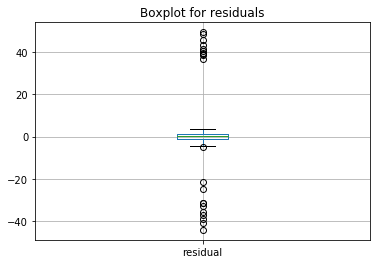

In [172]:
# ploting residuals
fig, ax = plt.subplots()
numeric_outlier.boxplot(column='residual', ax=ax)
ax.set_title('Boxplot for residuals')
plt.show()

There are residuals that is far from upper bound and lower bounds, let's see what are they.

In [173]:
numeric_outlier[abs(numeric_outlier['residual']) > 20][['delivery_charges','prediction','residual']]

,delivery_charges,prediction,residual
19,47.345,95.874028,48.529028
37,119.400,78.653973,-40.746027
70,116.340,77.530626,-38.809374
90,104.970,69.121676,-35.848324
92,33.675,70.361106,36.686106
105,38.635,77.895597,39.260597
114,52.130,101.382897,49.252897
125,97.905,66.288740,-31.616260
131,137.070,92.964438,-44.105562
239,115.455,78.371042,-37.083958


We can see that there are 20 observations where the delivery charges is to high or too low. Let's just remove these outliers for delivery charges.

In [174]:
cleaned_outliers_data = outliers_data[abs(numeric_outlier['residual']) <= 20]

In [175]:
cleaned_outliers_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       480 non-null    object 
 1   customer_id                    480 non-null    object 
 2   date                           480 non-null    object 
 3   nearest_warehouse              480 non-null    object 
 4   shopping_cart                  480 non-null    object 
 5   order_price                    480 non-null    int64  
 6   delivery_charges               480 non-null    float64
 7   customer_lat                   480 non-null    float64
 8   customer_long                  480 non-null    float64
 9   coupon_discount                480 non-null    int64  
 10  order_total                    480 non-null    float64
 11  season                         480 non-null    object 
 12  is_expedited_delivery          480 non-null    boo

## 4. Export output to csv

In [176]:
# check the dataframe again before export to csv
dirty_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,fixed_flag,cart,new_order_price,new_order_total,new_new_order_total,price_check
0,ORD343162,ID0650276301,2019-01-11,Bakers,"[('iAssist Line', 1), ('Lucent 330S', 1), ('iStream', 2)]",3755,95.82,-37.812714,144.982752,25,...,True,1.1384,great buy nice cheap phone. use for a backup on at&t. holds a charge nicely. doesnt have an external display but knew that when i ordered it. delivered on time. would buy again. exactly what i needed.,True,order_price,"[(Lucent 330S, 1), (iAssist Line, 1), (iStream, 2)]",3755,6688.32,2912.07,Wrong Order Price
1,ORD071177,ID2383218752,2019-07-03,Thompson,"[('Toshika 750', 2), ('Candle Inferno', 1)]",9070,81.28,-37.800452,144.959931,0,...,True,1.7693,"nice renewed phone phone reached on time, overall appearance was clean and nice.",True,season,"[(Candle Inferno, 1), (Toshika 750, 2)]",9070,9151.28,9151.28,Price correct
2,ORD327227,ID5001030328,2019-11-15,Thompson,"[('Candle Inferno', 1), ('iStream', 2), ('Thunder line', 1)]",2910,74.91,-37.811503,144.952677,25,...,False,0.5101,"cell phone phone is amazing thus far. set up was kind of difficult, but afterwards best phone i have had to date.",True,False,"[(Candle Inferno, 1), (Thunder line, 1), (iStream, 2)]",2910,2257.41,2257.41,Price correct
3,ORD117028,ID6167441078,2019-05-13,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivia x460', 1), ('Lucent 330S', 2)]",14860,63.04,-37.815780,144.965169,15,...,True,0.4967,"tablet was brought for my fiance for christmas. i had to return it because it kept freezing up. also, it didnt get clash of the clans game..",False,False,"[(Alcon 10, 1), (Lucent 330S, 2), (Olivia x460, 1), (iAssist Line, 1)]",14860,12694.04,12694.04,Price correct
4,ORD403847,ID2188399790,2019-08-15,Nickolson,"[('Universe Note', 1), ('iAssist Line', 1), ('iStream', 2), ('Alcon 10', 2)]",23875,75.97,-37.812775,144.968184,25,...,True,0.6589,five stars great buy and way cheaper than buying one through my cell phone service provider.,True,False,"[(Alcon 10, 2), (Universe Note, 1), (iAssist Line, 1), (iStream, 2)]",23875,17982.22,17982.22,Price correct


In [177]:
dirty_data = dirty_data.drop(['fixed_flag','cart','new_order_price','new_order_total','new_new_order_total','price_check'],axis=1)

In [178]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [179]:
# export data 
dirty_data.to_csv('30475422_dirty_data_solution.csv', index=False)

In [180]:
# check the data again before export to csv 
missing_data.head()

,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
order_id,,,,,,,,,,,,,,,
ORD446975,ID0207093574,2019-01-08,Bakers,"[('iAssist Line', 2), ('Candle Inferno', 1), ('iStream', 2)]",5180.0,98.31,-37.803624,145.007949,0,5278.31,Summer,True,1.3244,five stars all good. met the expectations.,1.0
ORD398405,ID0577459022,2019-10-29,NaN,"[('iStream', 2), ('Thunder line', 2), ('Candle Inferno', 2)]",5520.0,94.90,-37.817401,144.970546,5,5338.90,Spring,True,NaN,five stars everything was fine!,1.0
ORD210364,ID2069604225,2019-05-22,Bakers,"[('Olivia x460', 2), ('pearTV', 2), ('Lucent 330S', 1), ('Universe Note', 2)]",23200.0,69.06,-37.802215,144.980289,0,23269.06,Autumn,False,1.5740,working great without issues as described. working great without issues. was brand new in sealed box. i can confirm that this is the at&t variant olivia universe s7.,1.0
ORD008848,ID1492410198,2019-12-27,Nickolson,"[('iStream', 1), ('Thunder line', 2), ('Olivia x460', 1)]",5735.0,83.72,-37.806579,144.962869,10,5245.22,Summer,True,1.4610,"no, i received the phone and instead of white ... no, i received the phone and instead of white is was black. i didn't returned the phone because it was for someone else out of the u.s.",0.0
ORD186466,ID0581784158,2019-04-12,Thompson,"[('iAssist Line', 2), ('pearTV', 1), ('Toshika 750', 1), ('Thunder line', 1)]",17260.0,49.94,-37.807741,144.939718,25,12994.94,Autumn,False,0.8481,didn't get the correct phone purchased this phone for an upcoming vacation. recieved a olivia s9 plus instead. super annoying :(,0.0


In [181]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, ORD446975 to ORD191015
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    500 non-null    object 
 1   date                           500 non-null    object 
 2   nearest_warehouse              445 non-null    object 
 3   shopping_cart                  500 non-null    object 
 4   order_price                    485 non-null    float64
 5   delivery_charges               460 non-null    float64
 6   customer_lat                   500 non-null    float64
 7   customer_long                  500 non-null    float64
 8   coupon_discount                500 non-null    int64  
 9   order_total                    485 non-null    float64
 10  season                         500 non-null    object 
 11  is_expedited_delivery          500 non-null    bool   
 12  distance_to_nearest_warehouse  469 non-nu

In [182]:
# export data 
missing_data.to_csv('30475422_missing_data_solution.csv', index=False)

In [183]:
# export data 
cleaned_outliers_data.to_csv('30475422_outlier_data_solution.csv', index=False)

## 5. Summary

This is a quite long assignment with many different processes, requiring many different data auditing techniques. Firstly I have to perform Exploratory Data Analysis to understand the data, finding data anomalies. Then for each type of anomaly, I have to develop strategies to fix it. Besides easy to detect anomalies, such as latitude and longitude, there are more complicated anomalies which require more effort and advanced techniques to identify and fix the problem. In the case of item price and order price, I could not use Python to solve the problem, still I finished the task using Excel. I think for the data wrangling process, we can use different tools and methods at once to improve efficiency. However my methods using Excel might be unusable when facing more complicated problems, such as linear regression models to find outliers.

After finishing this assignment, I have learned how to identify anomalies: syntactic, semantic and coverage anomalies; how to calculate distance between geographic location using haversine methods; how to perform sentiment analysis; linear regression for detecting outliers based on their residuals. To conclude, this is a long, tough but really fun assignment.


## 6. References


BEN_YO (2019, Jan 30), *pandas value_counts: sort bu value, then alphabetically?* [Response to]. https://stackoverflow.com/q/54444593/

joris (2015, Apr 27), *Print very long string completely in pandas dataframe* [Response to]. Retrieved from https://stackoverflow.com/q/29902714/

Measure Space (2019), *User Joblib to run your Python code in parallel.* Retrived from https://medium.com/@measurespace/use-joblib-to-run-your-python-code-in-parallel-ad82abb26954

Parul, P., (2018), *Simplifying Sentiment Analysis using VADER in Python (on Social Media Text)*. Retrived from https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

rochacbruno (2011), *Calculate distance between latitude longitude pairs with Python*. Retrive from https://gist.github.com/rochacbruno/2883505


